# Project: Investigating the No-Show Trend in Medical Appointments in Brazil in 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The analysis will be tackling 2 questions which help with the understanding of the charactersitics that cause patients to miss their appointments in Brazil based on the data from 2016.

This analysis will be addressing 2 questions as shown below:
* Research Question 1: Based on the characteristics/factors given about the patient. Which factor/factors have a drastic affect on the patients missing their appointment or What factors if any have more patients miss their appointment than attended?
* Research Question 2: Given the patient has missed the appointment, what factor(s) is/are a/an indicator for a scheduled appointment to be missed?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Loading the data and printing out a few lines.
#Inspecting data types and looking for instances of missing or possibly errant data.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


Following are the columns found in this dataset.

In [2]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [3]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921800e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

The following columns are to be converted to the datetime data type:
* ScheduledDay
* AppointmentDay 

### Columns Description:

This is what the following columns signify:
* **PatientId:** The unique id of the respective patient
* **AppointmentID:** The unique id of the respective appointment
* **Gender:** Depicts whether the patient is Male(M) or Female(F)
* **ScheduledDay:** Signifies the day the patient registered their appointment
* **AppointmentDay:** The day of the actual appointment, when the visit to the doctor happens
* **Age:** The age of the patient
* **Neighbourhood:** The neighbourhood where the appointment takes place/indicates the location of the hospital. 
* **Scholarship:** Indicates whether or not the patient is enrolled in Brasilian welfare program called Bolsa Família.
* **Hipertension:** Indicates whether the patient has Hypertension or not.
* **Diabetes:** Indicates whether the patient has Diabetes or not.
* **Alcoholism:** Indicates whether the patient has Alcoholism or not.
* **Handcap:** Indicates whether the patient is Handicaped or not.
* **SMS_received:** Indicates whether sms was received by the patient or not prior to the appointment.
* **No-show:** Indicates whether the patient has shown up or not. "Yes" signifies that the patient did not show up to the medical appointment and "No" means the opposite.

In [4]:
df.head(2)

PatientId  AppointmentID Gender          ScheduledDay  \
0   29872499824296        5642903      F  2016-04-29T18:38:08Z   
1  558997776694438        5642503      M  2016-04-29T16:08:27Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No

In [5]:
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 110527 rows and 14 columns


In [6]:
print("The number of duplicate patient ids found are:",df['PatientId'].duplicated().sum())
#print("\n")
print("The number of duplicate appointment ids found are:",df['AppointmentID'].duplicated().sum())

The number of duplicate patient ids found are: 48228
The number of duplicate appointment ids found are: 0


In [7]:
#number of unique non-repeating values for each feature
df[['PatientId','AppointmentID','Age','Neighbourhood']].nunique(dropna=True)

PatientId         62299
AppointmentID    110527
Age                 104
Neighbourhood        81
dtype: int64

This tells us that out of **110,527** total entries only **62,299** unique patients were registered in the system. **48,228** patient ids are duplicates so that means that they are repeating patients.

Drop the following column(s):
* AppointmentID

In [8]:
df.drop('AppointmentID',axis=1,inplace=True)
print("The dataframe now has {} columns".format(df.shape[1]))

The dataframe now has 13 columns


In [9]:
df.head()

PatientId Gender          ScheduledDay        AppointmentDay  Age  \
0   29872499824296      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   
1  558997776694438      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56   
2    4262962299951      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62   
3     867951213174      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8   
4    8841186448183      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

Now, the ScheduledDay and AppointmentDay columns have to be converted to date time type from string type.

In [10]:
df['ScheduledDay_date'] = df['ScheduledDay'].str.extract('(\d\d\d\d-\d\d-\d\d)', expand=True)

In [11]:
df['ScheduledDay_time'] = df['ScheduledDay'].str.extract('(\d\d:\d\d:\d\d)', expand=True)

Function used to move columns in the dataframe is taken from https://towardsdatascience.com/reordering-pandas-dataframe-columns-thumbs-down-on-standard-solutions-1ff0bc2941d5

In [12]:
#Function used to move columns in the dataframe

def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

df = movecol(df, 
             cols_to_move=['ScheduledDay_date','ScheduledDay_time'], 
             ref_col='Gender',
             place='After')

In [13]:
df.head()

PatientId Gender ScheduledDay_date ScheduledDay_time  \
0   29872499824296      F        2016-04-29          18:38:08   
1  558997776694438      M        2016-04-29          16:08:27   
2    4262962299951      F        2016-04-29          16:19:04   
3     867951213174      F        2016-04-29          17:29:31   
4    8841186448183      F        2016-04-29          16:07:23   

           ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

Now the dataframe looks like this:

In [14]:
df['AppointmentDay_date'] = df['AppointmentDay'].str.extract('(\d\d\d\d-\d\d-\d\d)', expand=True)
df['AppointmentDay_time'] = df['AppointmentDay'].str.extract('(\d\d:\d\d:\d\d)', expand=True)
df = movecol(df, 
             cols_to_move=['AppointmentDay_date','AppointmentDay_time'], 
             ref_col='Age',
             place='Before')
df.head()

PatientId Gender ScheduledDay_date ScheduledDay_time  \
0   29872499824296      F        2016-04-29          18:38:08   
1  558997776694438      M        2016-04-29          16:08:27   
2    4262962299951      F        2016-04-29          16:19:04   
3     867951213174      F        2016-04-29          17:29:31   
4    8841186448183      F        2016-04-29          16:07:23   

           ScheduledDay        AppointmentDay AppointmentDay_date  \
0  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z          2016-04-29   
1  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z          2016-04-29   
2  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z          2016-04-29   
3  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z          2016-04-29   
4  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z          2016-04-29   

  AppointmentDay_time  Age      Neighbourhood  Scholarship  Hipertension  \
0            00:00:00   62    JARDIM DA PENHA            0             1   
1            00:00:00   56    JARDIM DA PENHA            0             0   
2            00:00:00   62      MATA DA PRAIA            0             0   
3            00:00:00    8  PONTAL DE CAMBURI            0             0   
4            00:00:00   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

Drop the following columns:
* ScheduledDay
* AppointmentDay

In [15]:
df.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)
print("The dataframe now has {} columns".format(df.shape[1]))

The dataframe now has 15 columns


**Dataframe as of now**

In [16]:
df.head()

PatientId Gender ScheduledDay_date ScheduledDay_time  \
0   29872499824296      F        2016-04-29          18:38:08   
1  558997776694438      M        2016-04-29          16:08:27   
2    4262962299951      F        2016-04-29          16:19:04   
3     867951213174      F        2016-04-29          17:29:31   
4    8841186448183      F        2016-04-29          16:07:23   

  AppointmentDay_date AppointmentDay_time  Age      Neighbourhood  \
0          2016-04-29            00:00:00   62    JARDIM DA PENHA   
1          2016-04-29            00:00:00   56    JARDIM DA PENHA   
2          2016-04-29            00:00:00   62      MATA DA PRAIA   
3          2016-04-29            00:00:00    8  PONTAL DE CAMBURI   
4          2016-04-29            00:00:00   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

Inspecting Datatypes:

In [17]:
df['ScheduledDay_date'] = pd.to_datetime(df['ScheduledDay_date'],format='%Y-%m-%d')
#same thing as above df['ScheduledDay_date'] = df['ScheduledDay_date'].dt.date.astype('datetime64') 

df['ScheduledDay_time'] = pd.to_datetime(df['ScheduledDay_time'],format='%H:%M:%S')
#df['ScheduledDay_time'] = pd.to_datetime(df['ScheduledDay_time']).strftime("%H:%M:%S")
df['AppointmentDay_date'] = pd.to_datetime(df['AppointmentDay_date'],format='%Y-%m-%d')
df['AppointmentDay_time'] = pd.to_datetime(df['AppointmentDay_time'],format='%H:%M:%S')
df.dtypes

PatientId                       int64
Gender                         object
ScheduledDay_date      datetime64[ns]
ScheduledDay_time      datetime64[ns]
AppointmentDay_date    datetime64[ns]
AppointmentDay_time    datetime64[ns]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [18]:
df.head()

PatientId Gender ScheduledDay_date   ScheduledDay_time  \
0   29872499824296      F        2016-04-29 1900-01-01 18:38:08   
1  558997776694438      M        2016-04-29 1900-01-01 16:08:27   
2    4262962299951      F        2016-04-29 1900-01-01 16:19:04   
3     867951213174      F        2016-04-29 1900-01-01 17:29:31   
4    8841186448183      F        2016-04-29 1900-01-01 16:07:23   

  AppointmentDay_date AppointmentDay_time  Age      Neighbourhood  \
0          2016-04-29          1900-01-01   62    JARDIM DA PENHA   
1          2016-04-29          1900-01-01   56    JARDIM DA PENHA   
2          2016-04-29          1900-01-01   62      MATA DA PRAIA   
3          2016-04-29          1900-01-01    8  PONTAL DE CAMBURI   
4          2016-04-29          1900-01-01   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

In [19]:
df['ScheduledDay_date'].describe()

count                  110527
unique                    111
top       2016-05-03 00:00:00
freq                     4238
first     2015-11-10 00:00:00
last      2016-06-08 00:00:00
Name: ScheduledDay_date, dtype: object

In [20]:
df['AppointmentDay_time'].describe()

count                  110527
unique                      1
top       1900-01-01 00:00:00
freq                   110527
first     1900-01-01 00:00:00
last      1900-01-01 00:00:00
Name: AppointmentDay_time, dtype: object

Dropping AppointmentDay_time column:

In [21]:
#Drop AppointmentDay_time column
df.drop(['AppointmentDay_time'],axis=1,inplace=True)
print("The dataframe now has {} columns".format(df.shape[1]))

The dataframe now has 14 columns


Breaking down appointment day and scheduled day columns into individual columns and organizing the columns will look something like this:

In [22]:
#Breaking down appointment day and scheduled day columns into individual columns

df['Appt_Month'] = df['AppointmentDay_date'].dt.month
df["App_Day"] = df['AppointmentDay_date'].dt.day
df['Appointment_Weekday'] = df['AppointmentDay_date'].dt.dayofweek

df['Scheduled_hour'] = df['ScheduledDay_time'].dt.hour
df['Scheduled_Weekday'] = df['ScheduledDay_date'].dt.dayofweek 

In [23]:
#organizing the columns

df = movecol(df, 
             cols_to_move=['Scheduled_hour','Scheduled_Weekday'], 
             ref_col='ScheduledDay_time',
             place='After')

df = movecol(df, 
             cols_to_move=['Appt_Month','App_Day','Appointment_Weekday'], 
             ref_col='AppointmentDay_date',
             place='After')
df.head()

PatientId Gender ScheduledDay_date   ScheduledDay_time  \
0   29872499824296      F        2016-04-29 1900-01-01 18:38:08   
1  558997776694438      M        2016-04-29 1900-01-01 16:08:27   
2    4262962299951      F        2016-04-29 1900-01-01 16:19:04   
3     867951213174      F        2016-04-29 1900-01-01 17:29:31   
4    8841186448183      F        2016-04-29 1900-01-01 16:07:23   

   Scheduled_hour  Scheduled_Weekday AppointmentDay_date  Appt_Month  App_Day  \
0              18                  4          2016-04-29           4       29   
1              16                  4          2016-04-29           4       29   
2              16                  4          2016-04-29           4       29   
3              17                  4          2016-04-29           4       29   
4              16                  4          2016-04-29           4       29   

   Appointment_Weekday  Age      Neighbourhood  Scholarship  Hipertension  \
0                    4   62    JARDIM DA PENHA            0             1   
1                    4   56    JARDIM DA PENHA            0             0   
2                    4   62      MATA DA PRAIA            0             0   
3                    4    8  PONTAL DE CAMBURI            0             0   
4                    4   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

In [24]:
df.Scheduled_Weekday.value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Scheduled_Weekday, dtype: int64

Age column needs cleaning as there is a negative value

In [25]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Finding the entry with negative age value:

In [26]:
#finding the entry with negative age value
df.query('Age < 0')

PatientId Gender ScheduledDay_date   ScheduledDay_time  \
99832  465943158731293      F        2016-06-06 1900-01-01 08:58:13   

       Scheduled_hour  Scheduled_Weekday AppointmentDay_date  Appt_Month  \
99832               8                  0          2016-06-06           6   

       App_Day  Appointment_Weekday  Age Neighbourhood  Scholarship  \
99832        6                    0   -1         ROMÃO            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832             0         0           0        0             0      No

Dropping the negative age value and checking if the operation was successful:

In [27]:
#dropping the negative age value
df.drop(99832,axis=0,inplace=True)

In [28]:
#checking if the negative age value is dropped
df.query('Age < 0')

Empty DataFrame
Columns: [PatientId, Gender, ScheduledDay_date, ScheduledDay_time, Scheduled_hour, Scheduled_Weekday, AppointmentDay_date, Appt_Month, App_Day, Appointment_Weekday, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

In [29]:
#verify age column for valid entries
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Cleaning the Handicap Column:
* removing entries for 2, 3 and 4 as handicap is a yes or a no factor 0 signifies no and 1 signifies yes as shown below.

In [30]:
#remove entries for 2, 3 and 4 as handicap is a yes or a no factor 0 signifies no and 1 signifies yes
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [31]:
#dropping incorrect entries in handcap column
df.drop(df.loc[(df['Handcap']!=0) & (df['Handcap']!=1)].index, inplace=True)

Checking handcap column for correct entries:

In [32]:
#checking handcap column for correct entries
df.Handcap.value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

Cleaning the Neighbourhood Column:

In [33]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

The following Neighbourhoods will be removed due to insuffecient and inaccurate data:
* ILHAS OCEÂNICAS DE TRINDADE
* PARQUE INDUSTRIAL

In [34]:
#removing the neighbourhood
df.drop(df.loc[(df['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE')].index, inplace=True)

In [35]:
#removing the neighbourhood
df.drop(df.loc[(df['Neighbourhood']=='PARQUE INDUSTRIAL')].index, inplace=True)

Checking if removal of the neighbourhoods was successful

In [36]:
#checking if removal of the neighbourhoods was successfull
df.Neighbourhood.value_counts()

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4420
JARDIM DA PENHA      3872
ITARARÉ              3507
                     ... 
MORADA DE CAMBURI      96
PONTAL DE CAMBURI      69
ILHA DO BOI            35
ILHA DO FRADE          10
AEROPORTO               8
Name: Neighbourhood, Length: 79, dtype: int64

Inspecting the dataframe:

In [37]:
# inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110324 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PatientId            110324 non-null  int64         
 1   Gender               110324 non-null  object        
 2   ScheduledDay_date    110324 non-null  datetime64[ns]
 3   ScheduledDay_time    110324 non-null  datetime64[ns]
 4   Scheduled_hour       110324 non-null  int64         
 5   Scheduled_Weekday    110324 non-null  int64         
 6   AppointmentDay_date  110324 non-null  datetime64[ns]
 7   Appt_Month           110324 non-null  int64         
 8   App_Day              110324 non-null  int64         
 9   Appointment_Weekday  110324 non-null  int64         
 10  Age                  110324 non-null  int64         
 11  Neighbourhood        110324 non-null  object        
 12  Scholarship          110324 non-null  int64         
 13  Hipertension  

In [38]:
#preview of dataframe
df.head()

PatientId Gender ScheduledDay_date   ScheduledDay_time  \
0   29872499824296      F        2016-04-29 1900-01-01 18:38:08   
1  558997776694438      M        2016-04-29 1900-01-01 16:08:27   
2    4262962299951      F        2016-04-29 1900-01-01 16:19:04   
3     867951213174      F        2016-04-29 1900-01-01 17:29:31   
4    8841186448183      F        2016-04-29 1900-01-01 16:07:23   

   Scheduled_hour  Scheduled_Weekday AppointmentDay_date  Appt_Month  App_Day  \
0              18                  4          2016-04-29           4       29   
1              16                  4          2016-04-29           4       29   
2              16                  4          2016-04-29           4       29   
3              17                  4          2016-04-29           4       29   
4              16                  4          2016-04-29           4       29   

   Appointment_Weekday  Age      Neighbourhood  Scholarship  Hipertension  \
0                    4   62    JARDIM DA PENHA            0             1   
1                    4   56    JARDIM DA PENHA            0             0   
2                    4   62      MATA DA PRAIA            0             0   
3                    4    8  PONTAL DE CAMBURI            0             0   
4                    4   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

Renaming the Columns now

In [39]:
df.rename(columns={"PatientId": "Patient_ID", "ScheduledDay_date":"Scheduled_Date","ScheduledDay_time":"Scheduled_Time","Scheduled_hour":"Scheduled_Hour","AppointmentDay_date":"Appointment_Date","Appt_Month":"Appointment_Month","App_Day":"Appointment_Day","Hipertension":"Hypertension","Handcap":"Handicap","SMS_received":"SMS_Received","No-show":"Appointment_Missed"}, inplace=True)

#### Final Cleaned Dataframe:

In [40]:
df.head()

Patient_ID Gender Scheduled_Date      Scheduled_Time  Scheduled_Hour  \
0   29872499824296      F     2016-04-29 1900-01-01 18:38:08              18   
1  558997776694438      M     2016-04-29 1900-01-01 16:08:27              16   
2    4262962299951      F     2016-04-29 1900-01-01 16:19:04              16   
3     867951213174      F     2016-04-29 1900-01-01 17:29:31              17   
4    8841186448183      F     2016-04-29 1900-01-01 16:07:23              16   

   Scheduled_Weekday Appointment_Date  Appointment_Month  Appointment_Day  \
0                  4       2016-04-29                  4               29   
1                  4       2016-04-29                  4               29   
2                  4       2016-04-29                  4               29   
3                  4       2016-04-29                  4               29   
4                  4       2016-04-29                  4               29   

   Appointment_Weekday  Age      Neighbourhood  Scholarship  Hypertension  \
0                    4   62    JARDIM DA PENHA            0             1   
1                    4   56    JARDIM DA PENHA            0             0   
2                    4   62      MATA DA PRAIA            0             0   
3                    4    8  PONTAL DE CAMBURI            0             0   
4                    4   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_Received Appointment_Missed  
0         0           0         0             0                 No  
1         0           0         0             0                 No  
2         0           0         0             0                 No  
3         0           0         0             0                 No  
4         1           0         0             0                 No

Making a copy of the original dataframe, so that a dataframe filtered for only patients who missed their appointments can be created as shown below:

In [41]:
df_new = df.copy() 

df_yes = df_new[df_new['Appointment_Missed'] == 'Yes']
print(df_yes.shape)
df_yes.head()

(22276, 19)


Patient_ID Gender Scheduled_Date      Scheduled_Time  Scheduled_Hour  \
6   733688164476661      F     2016-04-27 1900-01-01 15:05:12              15   
7     3449833394123      F     2016-04-27 1900-01-01 15:39:58              15   
11    7542951368435      M     2016-04-26 1900-01-01 08:44:12               8   
17   14794966191172      F     2016-04-28 1900-01-01 09:28:57               9   
20  622257462899397      F     2016-04-27 1900-01-01 07:51:14               7   

    Scheduled_Weekday Appointment_Date  Appointment_Month  Appointment_Day  \
6                   2       2016-04-29                  4               29   
7                   2       2016-04-29                  4               29   
11                  1       2016-04-29                  4               29   
17                  3       2016-04-29                  4               29   
20                  2       2016-04-29                  4               29   

    Appointment_Weekday  Age   Neighbourhood  Scholarship  Hypertension  \
6                     4   23      GOIABEIRAS            0             0   
7                     4   39      GOIABEIRAS            0             0   
11                    4   29  NOVA PALESTINA            0             0   
17                    4   40       CONQUISTA            1             0   
20                    4   30  NOVA PALESTINA            0             0   

    Diabetes  Alcoholism  Handicap  SMS_Received Appointment_Missed  
6          0           0         0             0                Yes  
7          0           0         0             0                Yes  
11         0           0         0             1                Yes  
17         0           0         0             0                Yes  
20         0           0         0             0                Yes

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Based on the characteristics/factors given about the patient. Which factor/factors have a drastic affect on the patients missing their appointment or What factors if any have more patients miss their appointment than attended?

### 1.1 Gender Factor Analysis

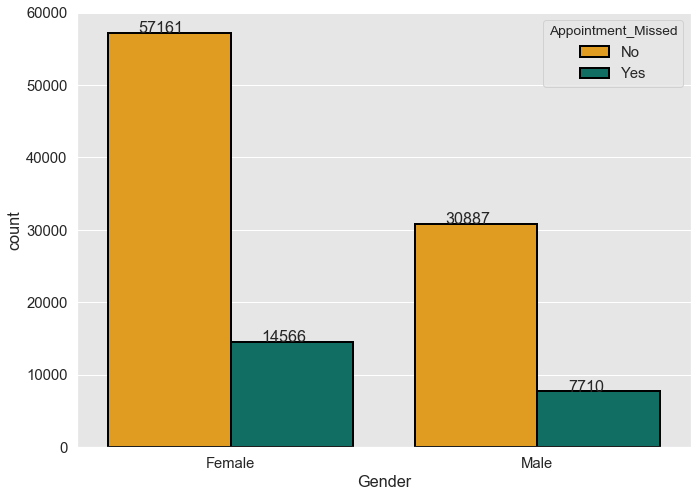

In [42]:
#Gender Factor Analyzed
plt.figure(figsize=(11,8))
sns.set(font_scale=1.35)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
gender_count = sns.countplot(x='Gender', data=df, hue= 'Appointment_Missed' ,palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2);
gender_count.set_xticklabels(["Female","Male"]);
for p in gender_count.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    gender_count.text(txt_x+0.1,txt_y+8,txt)

Based on the plot above, Females attended and missed more number of appointments than Males. In conclusion, number of missed appointments by both genders were less than the number of attended appointments.

In [43]:
df.groupby(['Gender'])['Appointment_Missed'].value_counts(normalize=True)

Gender  Appointment_Missed
F       No                    0.796924
        Yes                   0.203076
M       No                    0.800244
        Yes                   0.199756
Name: Appointment_Missed, dtype: float64

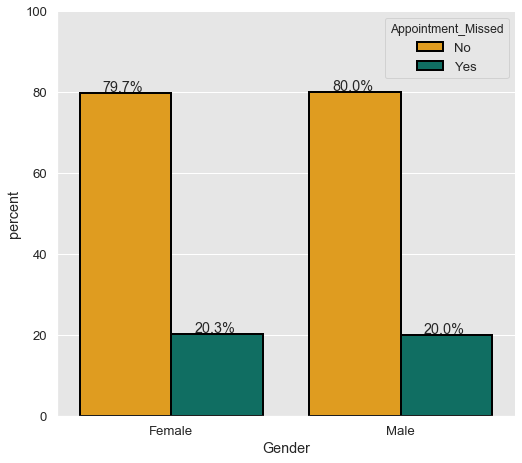

In [44]:
#Gender Factor Normalized
sns.set(font_scale=1.2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
gender = df.groupby(['Gender'])['Appointment_Missed'].value_counts(normalize=True)
gender = gender.mul(100)
gender = gender.rename('percent').reset_index()
gender_graph = sns.catplot(x='Gender',y='percent',hue='Appointment_Missed',kind='bar',data=gender,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)
gender_graph.set_xticklabels(["Female","Male"]);                            
gender_graph.fig.set_size_inches(8,7)
gender_graph.ax.set_ylim(0,100)  

for p in gender_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    gender_graph.ax.text(txt_x+0.10,txt_y+0.46,txt)


Due to the difference in sample size for both genders, hence normalization was used to make a fair judgement. Given the above plot, there is no clear trend to be observed hence the gender factor is not a good idicator as neither of the gender have more patients miss their appointment than attended.

### 1.2 Age Factor Analysis

Now the age factor will be analyzed as shown below:

**Age Bracket Breakdown:**

To make the analysis of the Age factor simple, the age values were divided in 3 categories:
* Children_Adolescents: (0-14) years old
* Adult: (15-64) years old
* Senior: (>65) years old

As shown in the plot below, the adult category has the most number of counts for both appointment missed and appointment attended compared to the remaining age categories. 

In [45]:
# create a list of the conditions
conditions = [
    (df['Age'] <= 14),
    (df['Age'] >= 15) & (df['Age'] <= 64),
    (df['Age'] >= 65)]

# create a list of the values we want to assign for each condition
values = ['Children_Adolescents', 'Adult', 'Senior']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Age_Group'] = np.select(conditions, values)

df = movecol(df, 
             cols_to_move=['Age_Group'], 
             ref_col='Age',
             place='After')

# display updated DataFrame's head view
df.head(4)

Patient_ID Gender Scheduled_Date      Scheduled_Time  Scheduled_Hour  \
0   29872499824296      F     2016-04-29 1900-01-01 18:38:08              18   
1  558997776694438      M     2016-04-29 1900-01-01 16:08:27              16   
2    4262962299951      F     2016-04-29 1900-01-01 16:19:04              16   
3     867951213174      F     2016-04-29 1900-01-01 17:29:31              17   

   Scheduled_Weekday Appointment_Date  Appointment_Month  Appointment_Day  \
0                  4       2016-04-29                  4               29   
1                  4       2016-04-29                  4               29   
2                  4       2016-04-29                  4               29   
3                  4       2016-04-29                  4               29   

   Appointment_Weekday  Age             Age_Group      Neighbourhood  \
0                    4   62                 Adult    JARDIM DA PENHA   
1                    4   56                 Adult    JARDIM DA PENHA   
2                    4   62                 Adult      MATA DA PRAIA   
3                    4    8  Children_Adolescents  PONTAL DE CAMBURI   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_Received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   

  Appointment_Missed  
0                 No  
1                 No  
2                 No  
3                 No

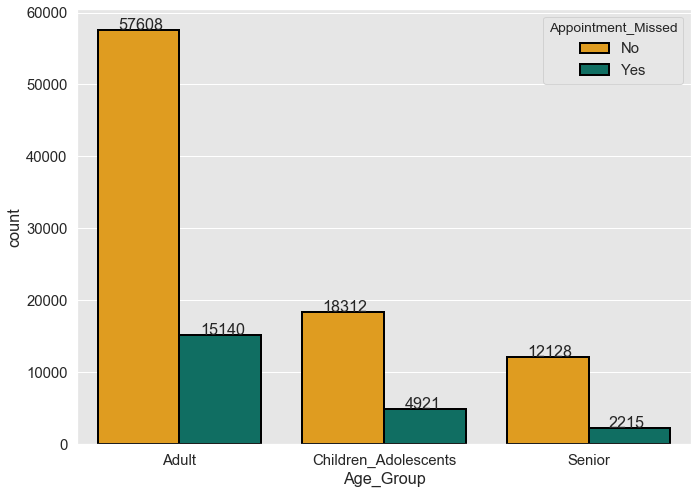

In [46]:
#Age Group Factor Analyzed
plt.figure(figsize=(11,8))
sns.set(font_scale=1.35)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
age_1 = sns.countplot(x='Age_Group', data=df, hue= 'Appointment_Missed' ,palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2);
for p in age_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    age_1.text(txt_x+0.1,txt_y+8,txt)

Code source: https://www.thetopsites.net/article/52692083.shtml

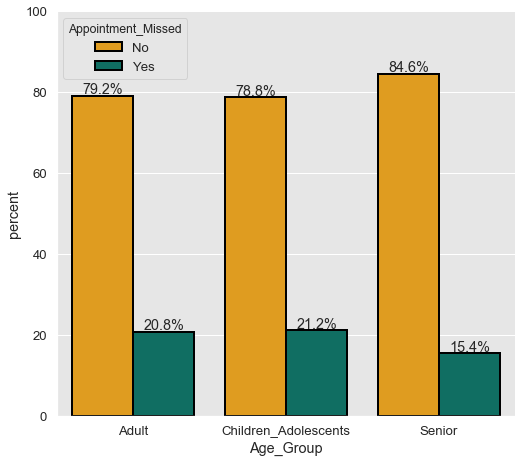

In [47]:
sns.set(font_scale=1.2)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
age = df.groupby(['Age_Group'])['Appointment_Missed'].value_counts(normalize=True)
age = age.mul(100)
age = age.rename('percent').reset_index()
age_graph = sns.catplot(x='Age_Group',y='percent',hue='Appointment_Missed',kind='bar',data=age,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

age_graph.fig.set_size_inches(8,7)
age_graph.ax.set_ylim(0,100)

for p in age_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    age_graph.ax.text(txt_x+0.07,txt_y+0.46,txt)


Due to the difference in the number of samples in each age group, the propotion for each age group was derived as shown above. The new plot depicts all three age groups with the proportion of appointment missed and appointment attended, with the senior age group having the most patients attending their appointments at **84.6%** compared to about **80%** of the remaining age groups. Due to normalization as shown above Children_Adolescents could face more appointments being missed compared to other age groups. 

To conclude, the age factor had more patients attending their appointments than missing it in all the age groups, **hence the age factor is not a good indicator** to show if a patient will show up for their scheduled appointment or not.

### 1.3 Scheduled Date Analysis

#### 1.3.1 Schedule Hour

Analyzing the hours at which the appointment was booked and whether the hour factor affected the appointment being missed or not.

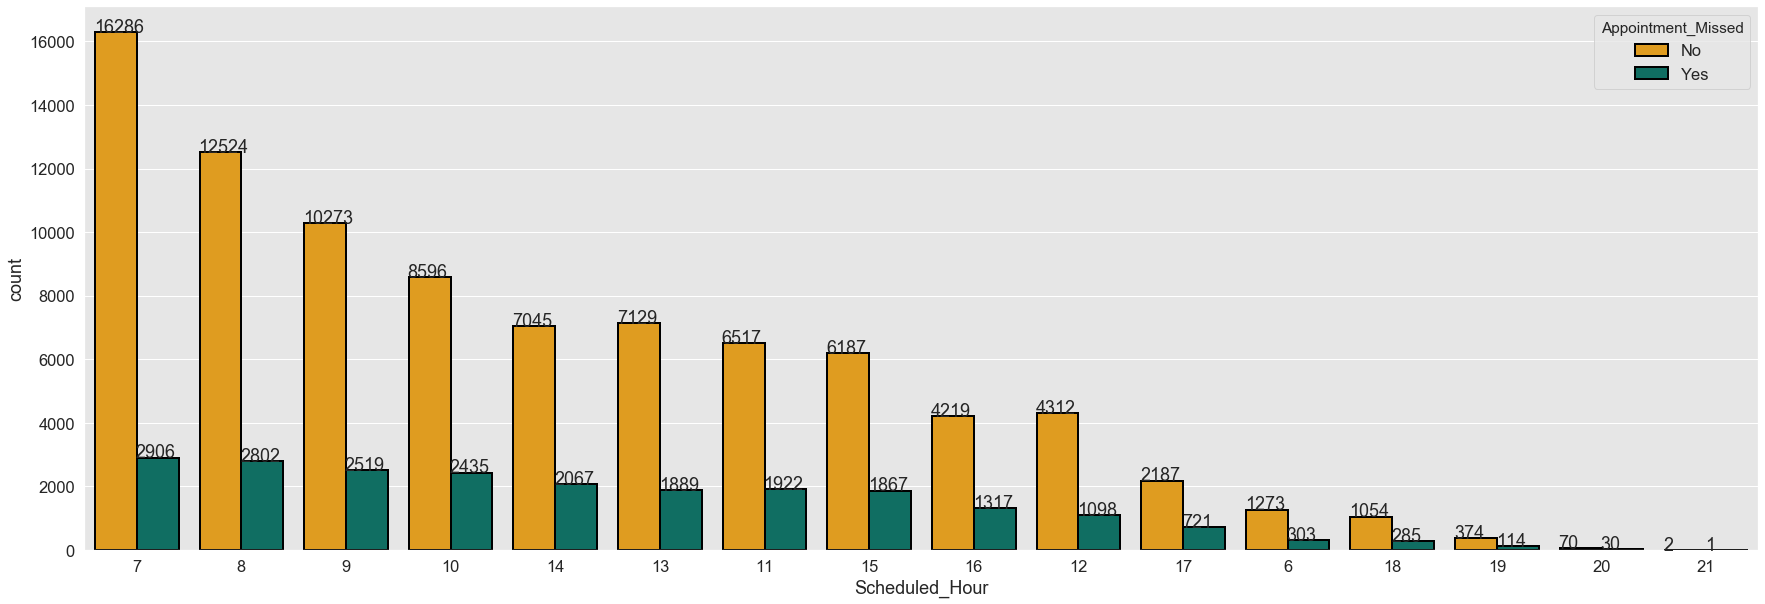

In [48]:
#Scheduled Hour Factor Analyzed
plt.figure(figsize=(30,10))

sns.set(font_scale=1.5,style='darkgrid')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

descending_order = df['Scheduled_Hour'].value_counts().sort_values(ascending=False).index

scheduled_hour_1 = sns.countplot(x='Scheduled_Hour', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2, order=descending_order);

for p in scheduled_hour_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scheduled_hour_1.text(txt_x-0.01,txt_y+1,txt)

Analyzing the above plot, **majority of appointments were booked at 7 am**, followed by **8,9,10 am** with **least number of appointments attended and missed at 21:00 Hours or 9 pm.** Due to the difference in the number of samples for each scheduled hour, the proportion of appointments missed and attended for each scheduled hour was derived as shown below. 

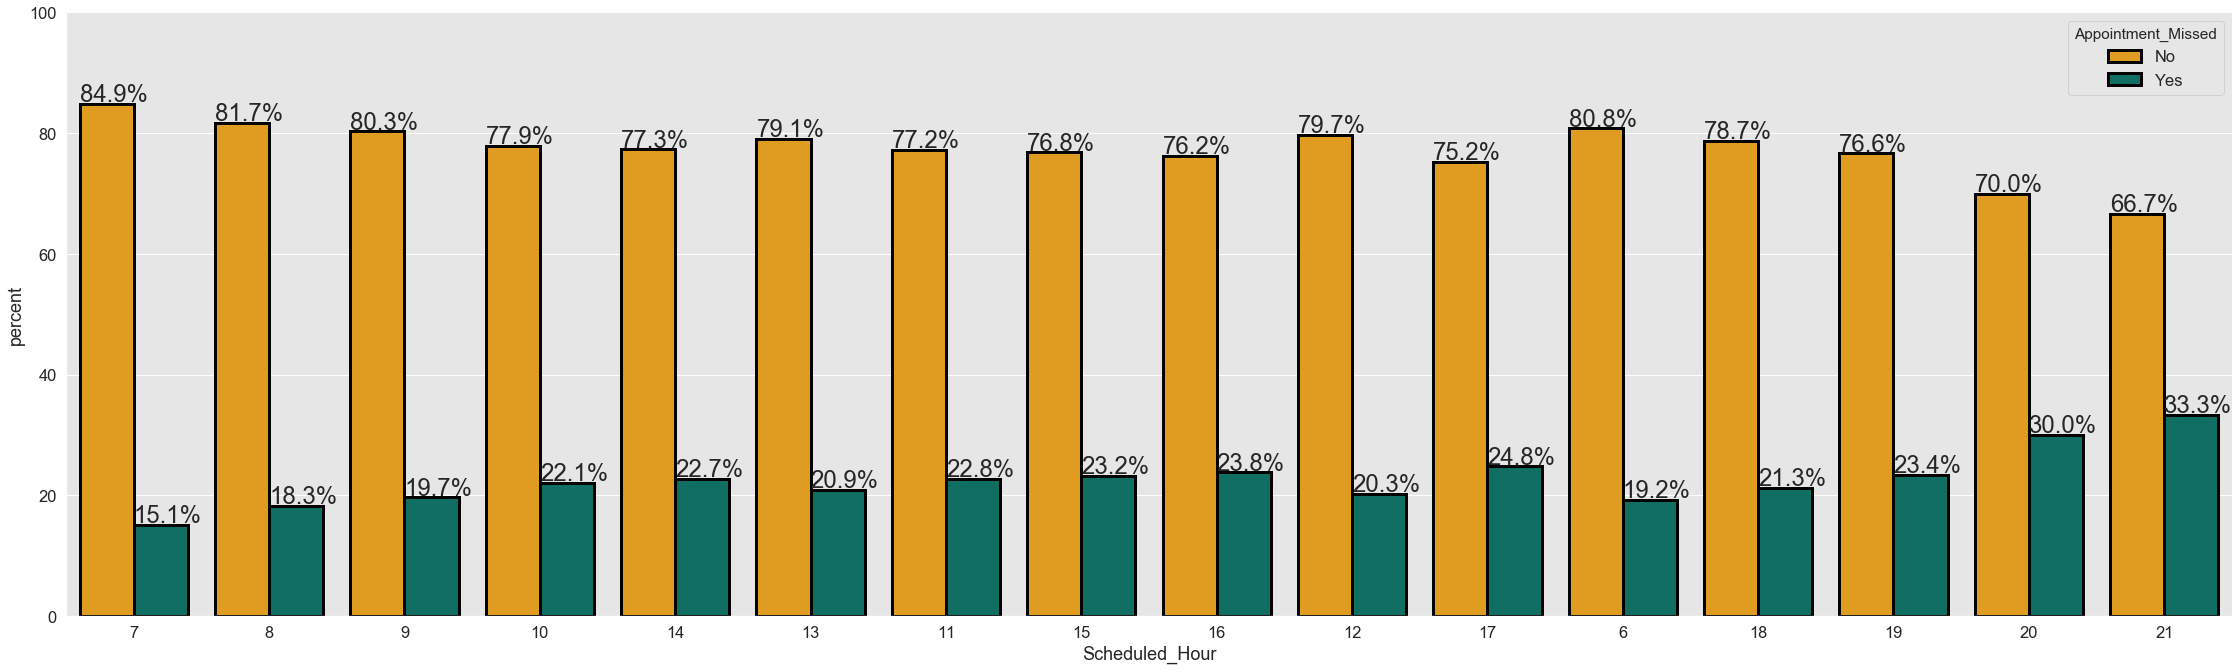

In [49]:
#proportion plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

descending_order = df['Scheduled_Hour'].value_counts().sort_values(ascending=False).index


scheduled_hour = df.groupby(['Scheduled_Hour'])['Appointment_Missed'].value_counts(normalize=True)
scheduled_hour = scheduled_hour.mul(100)
scheduled_hour = scheduled_hour.rename('percent').reset_index()
scheduled_hour_graph = sns.catplot(x='Scheduled_Hour',y='percent',hue='Appointment_Missed',kind='bar',data=scheduled_hour,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=3,legend_out=False,order=descending_order)

scheduled_hour_graph.fig.set_size_inches(40,11)
scheduled_hour_graph.ax.set_ylim(0,100)
sns.set(font_scale=2)

#scheduled_hour_graph.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);
for p in scheduled_hour_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scheduled_hour_graph.ax.text(txt_x,txt_y+0.4,txt)


To conclude, after normalizing the data above, the **7 am time seems to have the least number of missed appointments and the most appointments attended.** Other than that the scheduled hour factor had more or less similar proportion figures of patients attending their appointments or missing it in the scheduled hours as shown above and **none of the hours had more patients missing their appointments than attending them.**

#### 1.3.2 Schedule Weekday

Now breaking down the scheduled date factor further, I analyzed the weekday at which the appointment was booked and whether this factor affected the appointment being missed or not.

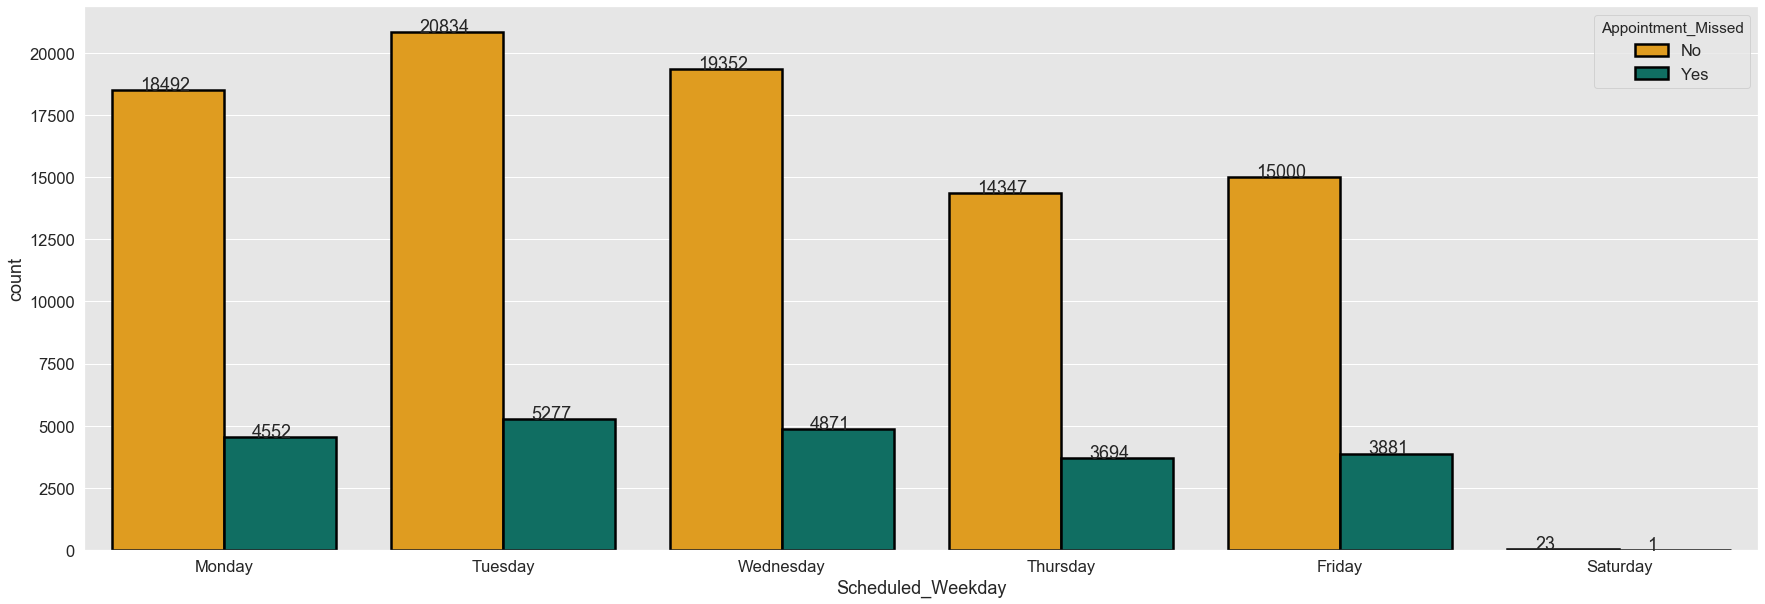

In [50]:
#Scheduled Weekday Factor Analyzed
plt.figure(figsize=(30,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
scheduled_weekday_1 = sns.countplot(x='Scheduled_Weekday', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
scheduled_weekday_1.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);

for p in scheduled_weekday_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scheduled_weekday_1.text(txt_x+0.1,txt_y+6.8,txt)

**Tuesday** among the other weekdays seems to have the **most number of appointments missed and attended** followed by Wednesday and Monday. Whereas **Saturday** witnessed the **least number of appointments attended and missed.** Due to the difference in the number of samples for each scheduled weekday, the proportion of appointments missed and/or attended for each weekday was derived as shown below.  

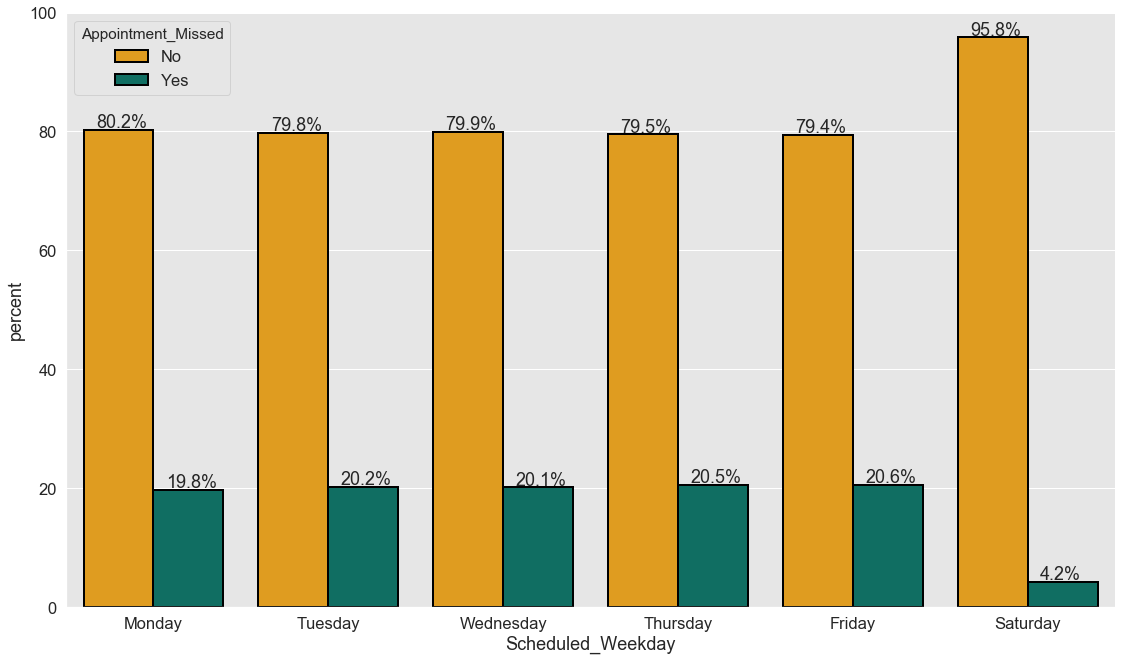

In [51]:
#proportion plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

scheduled_weekday = df.groupby(['Scheduled_Weekday'])['Appointment_Missed'].value_counts(normalize=True)
scheduled_weekday = scheduled_weekday.mul(100)
scheduled_weekday = scheduled_weekday.rename('percent').reset_index()
scheduled_weekday_graph = sns.catplot(x='Scheduled_Weekday',y='percent',hue='Appointment_Missed',kind='bar',data=scheduled_weekday,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

scheduled_weekday_graph.fig.set_size_inches(20,11)
scheduled_weekday_graph.ax.set_ylim(0,100)
scheduled_weekday_graph.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);
for p in scheduled_weekday_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scheduled_weekday_graph.ax.text(txt_x+0.07,txt_y+0.4,txt)


In conclusion, the scheduled weekday factor had very similar proportion figures of patients attending their appointments or missing it in the scheduled weekday as shown above with an exception of saturday but due to the lack of suffecient samples collected for that day a conclusive statement could not be produced. Therefore no weekday had more patients missing their appointment than appointments attended.

### 1.4 Appointment Date Analysis

In the appointment date factor only the date was avaliable. So this factor was broken down into 2 subfactors: appointment month and weekday.  

#### 1.4.1 Appointment Month

In this subfactor the month at which the appointment was booked for was analyzed. The analysis included whether the month of the appointment had an impact on the appointment being missed or not.

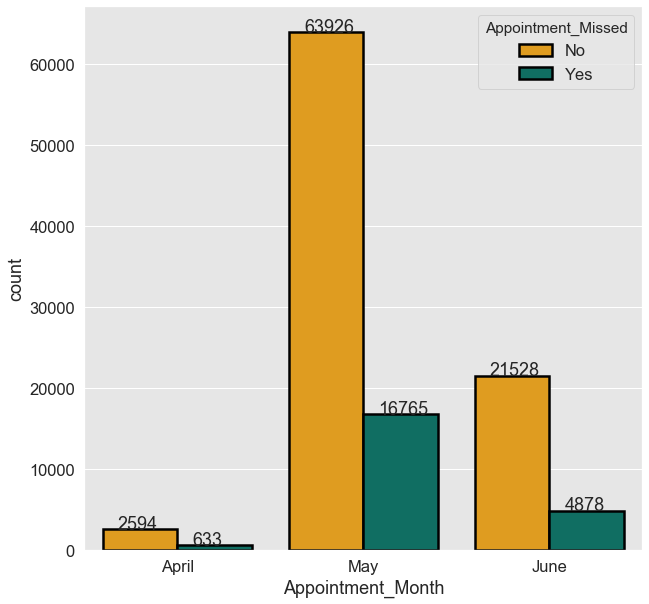

In [52]:
#Appointment Date Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
appointment_month_1 = sns.countplot(x='Appointment_Month', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
appointment_month_1.set_xticklabels(["April","May","June"]);

for p in appointment_month_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    appointment_month_1.text(txt_x+0.08,txt_y+6.8,txt)

Analyzing the count plot above, the month of **May** received the **most number of attended and missed appointments**, followed by June and April. Due to the difference in the number of samples collected the proportion of appointments missed and/or attended for each month was derived as shown below.

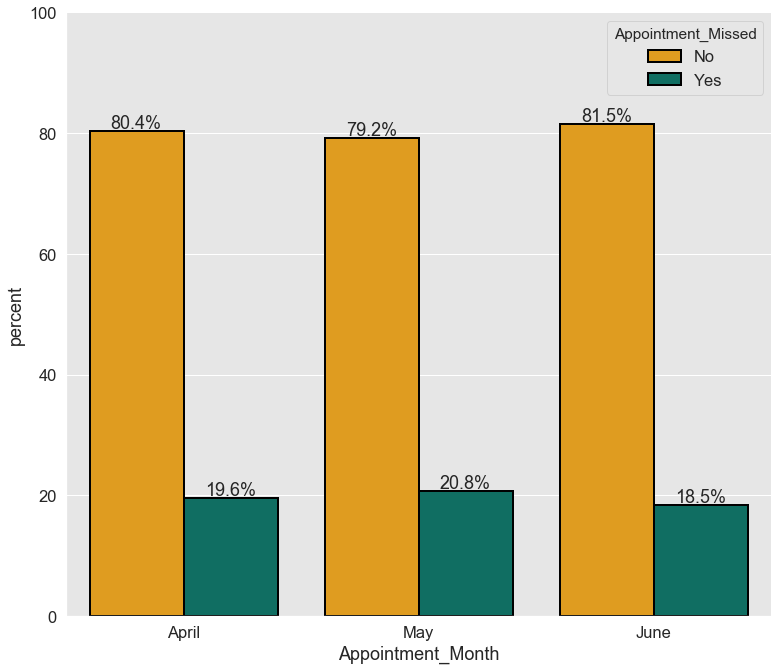

In [53]:
#proportion plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

appointment_month = df.groupby(['Appointment_Month'])['Appointment_Missed'].value_counts(normalize=True)
appointment_month = appointment_month.mul(100)
appointment_month = appointment_month.rename('percent').reset_index()
appointment_month_graph = sns.catplot(x='Appointment_Month',y='percent',hue='Appointment_Missed',kind='bar',data=appointment_month,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

appointment_month_graph.fig.set_size_inches(13,11)
appointment_month_graph.ax.set_ylim(0,100)
appointment_month_graph.set_xticklabels(["April","May","June"]);

for p in appointment_month_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    appointment_month_graph.ax.text(txt_x+0.09,txt_y+0.4,txt)


Analyzing the graph above, there is no pattern to make a sound conclusion and in both plots the number of patients missing their appointment was less than the attended appointment number.

#### 1.4.2 Appointment Weekday

In this subfactor the weekday at which the appointment was booked for was analyzed. The analysis included whether the weekday that the appointment happens to fall on had an impact on the appointment being missed or not.

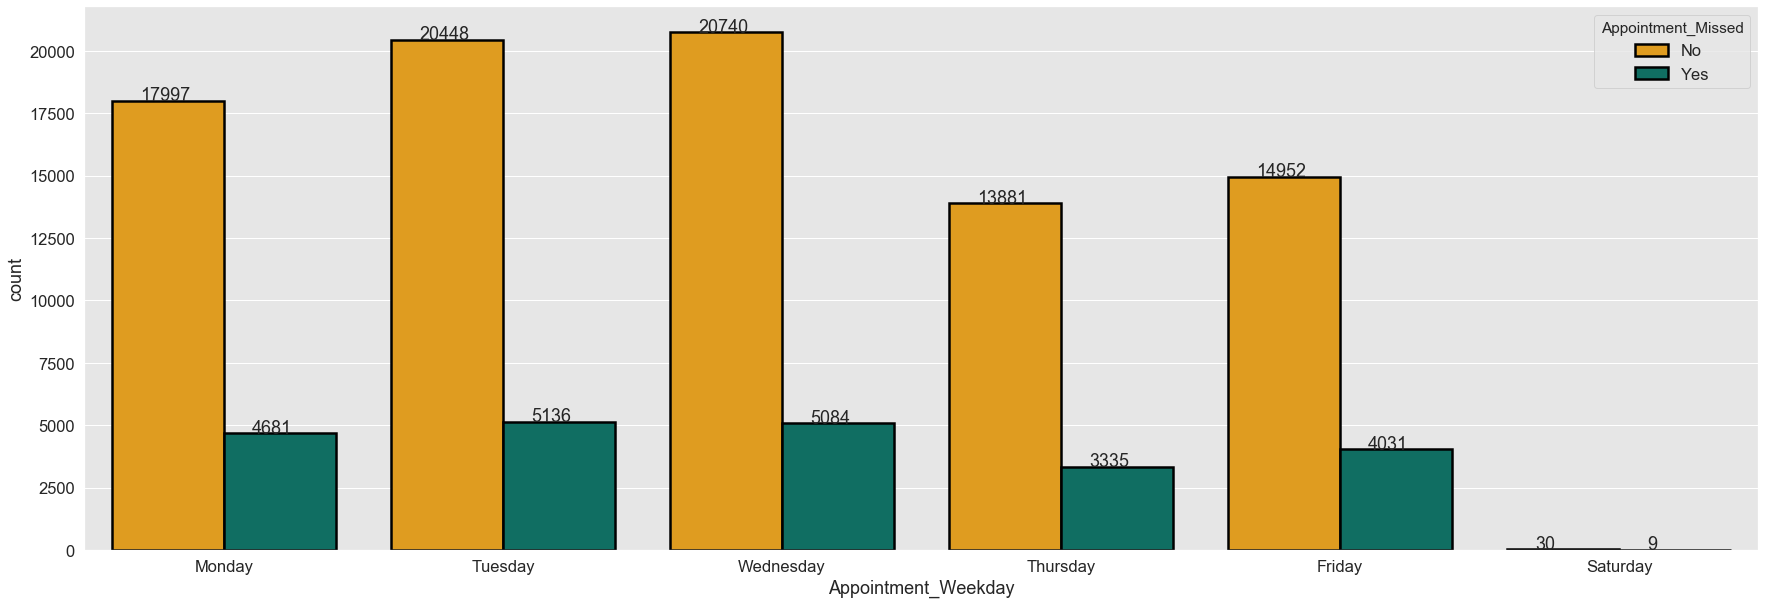

In [54]:
#Appointment Weekday Factor Analyzed
plt.figure(figsize=(30,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
appointment_weekday_1 = sns.countplot(x='Appointment_Weekday', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
appointment_weekday_1.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);

for p in appointment_weekday_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    appointment_weekday_1.text(txt_x+0.1,txt_y+6.8,txt)

Analyzing the count plot above, **Tuesday and Wednesday are the busiest day**, both the days received similar number of attended and missed appointments, followed by Monday, Friday and then Thursday. Due to the difference in the number of samples collected the proportion of appointments missed and/or attended for each weekday was derived as shown below.

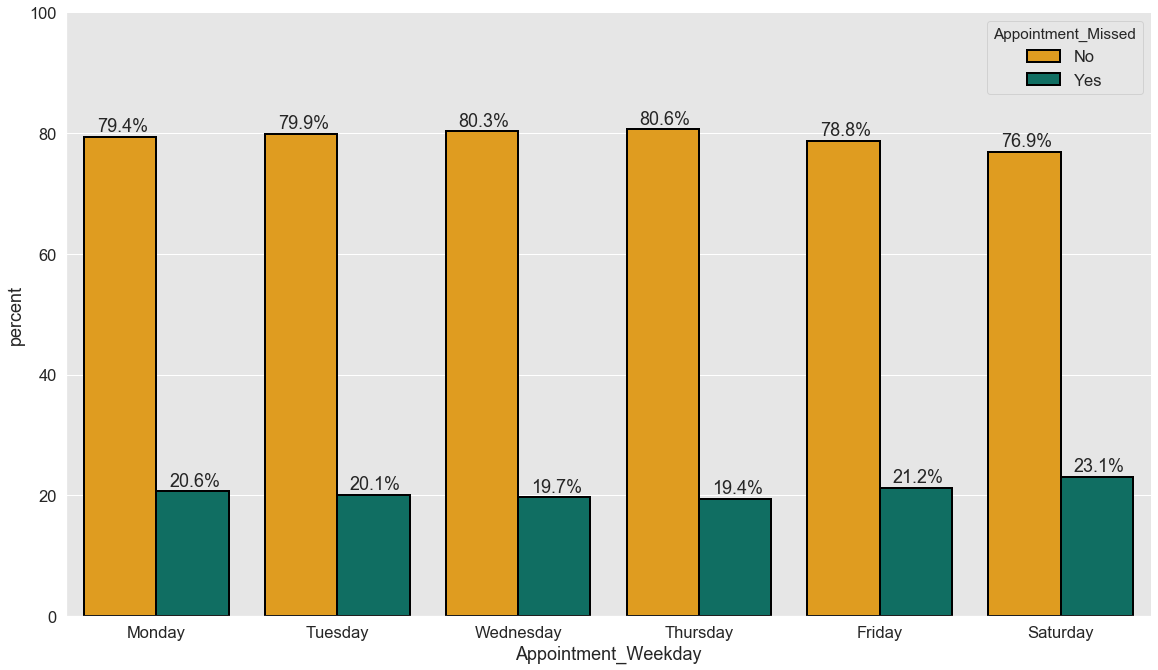

In [55]:
#proportion plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

appointment_weekday = df.groupby(['Appointment_Weekday'])['Appointment_Missed'].value_counts(normalize=True)
appointment_weekday = appointment_weekday.mul(100)
appointment_weekday = appointment_weekday.rename('percent').reset_index()
appointment_weekday_graph = sns.catplot(x='Appointment_Weekday',y='percent',hue='Appointment_Missed',kind='bar',data=appointment_weekday,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

appointment_weekday_graph.fig.set_size_inches(20,11)
appointment_weekday_graph.ax.set_ylim(0,100)
appointment_weekday_graph.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);
for p in appointment_weekday_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    appointment_weekday_graph.ax.text(txt_x+0.07,txt_y+0.9,txt)


Analyzing the graph above, there is no pattern found to make an accurate conclusion, though one thing is certain that is no weekday had more appointments being missed than attended.

### 1.5 Neighbourhood Analysis

In the Neighbourhood factor analysis, a count plot was plotted to check whether any neighbourhood had more missed appointments than the number of appointments attended. As shown below none of the neighbourhood possess more missed appointments than appointments attended. Though, neighbourhood JARDIM CAMBURI has the most number of missed and attended appointments followed by MARIA ORTIZ. On the contrary the least number of appointments were recorded in AEROPORTO neighbourhood.

In [56]:
df.groupby('Neighbourhood')['Appointment_Missed'].value_counts().sort_values(ascending=False)

Neighbourhood    Appointment_Missed
JARDIM CAMBURI   No                    6252
MARIA ORTIZ      No                    4586
RESISTÊNCIA      No                    3517
JARDIM DA PENHA  No                    3241
CENTRO           No                    2629
                                       ... 
ILHA DO FRADE    No                       8
AEROPORTO        No                       7
ILHA DO BOI      Yes                      3
ILHA DO FRADE    Yes                      2
AEROPORTO        Yes                      1
Name: Appointment_Missed, Length: 158, dtype: int64

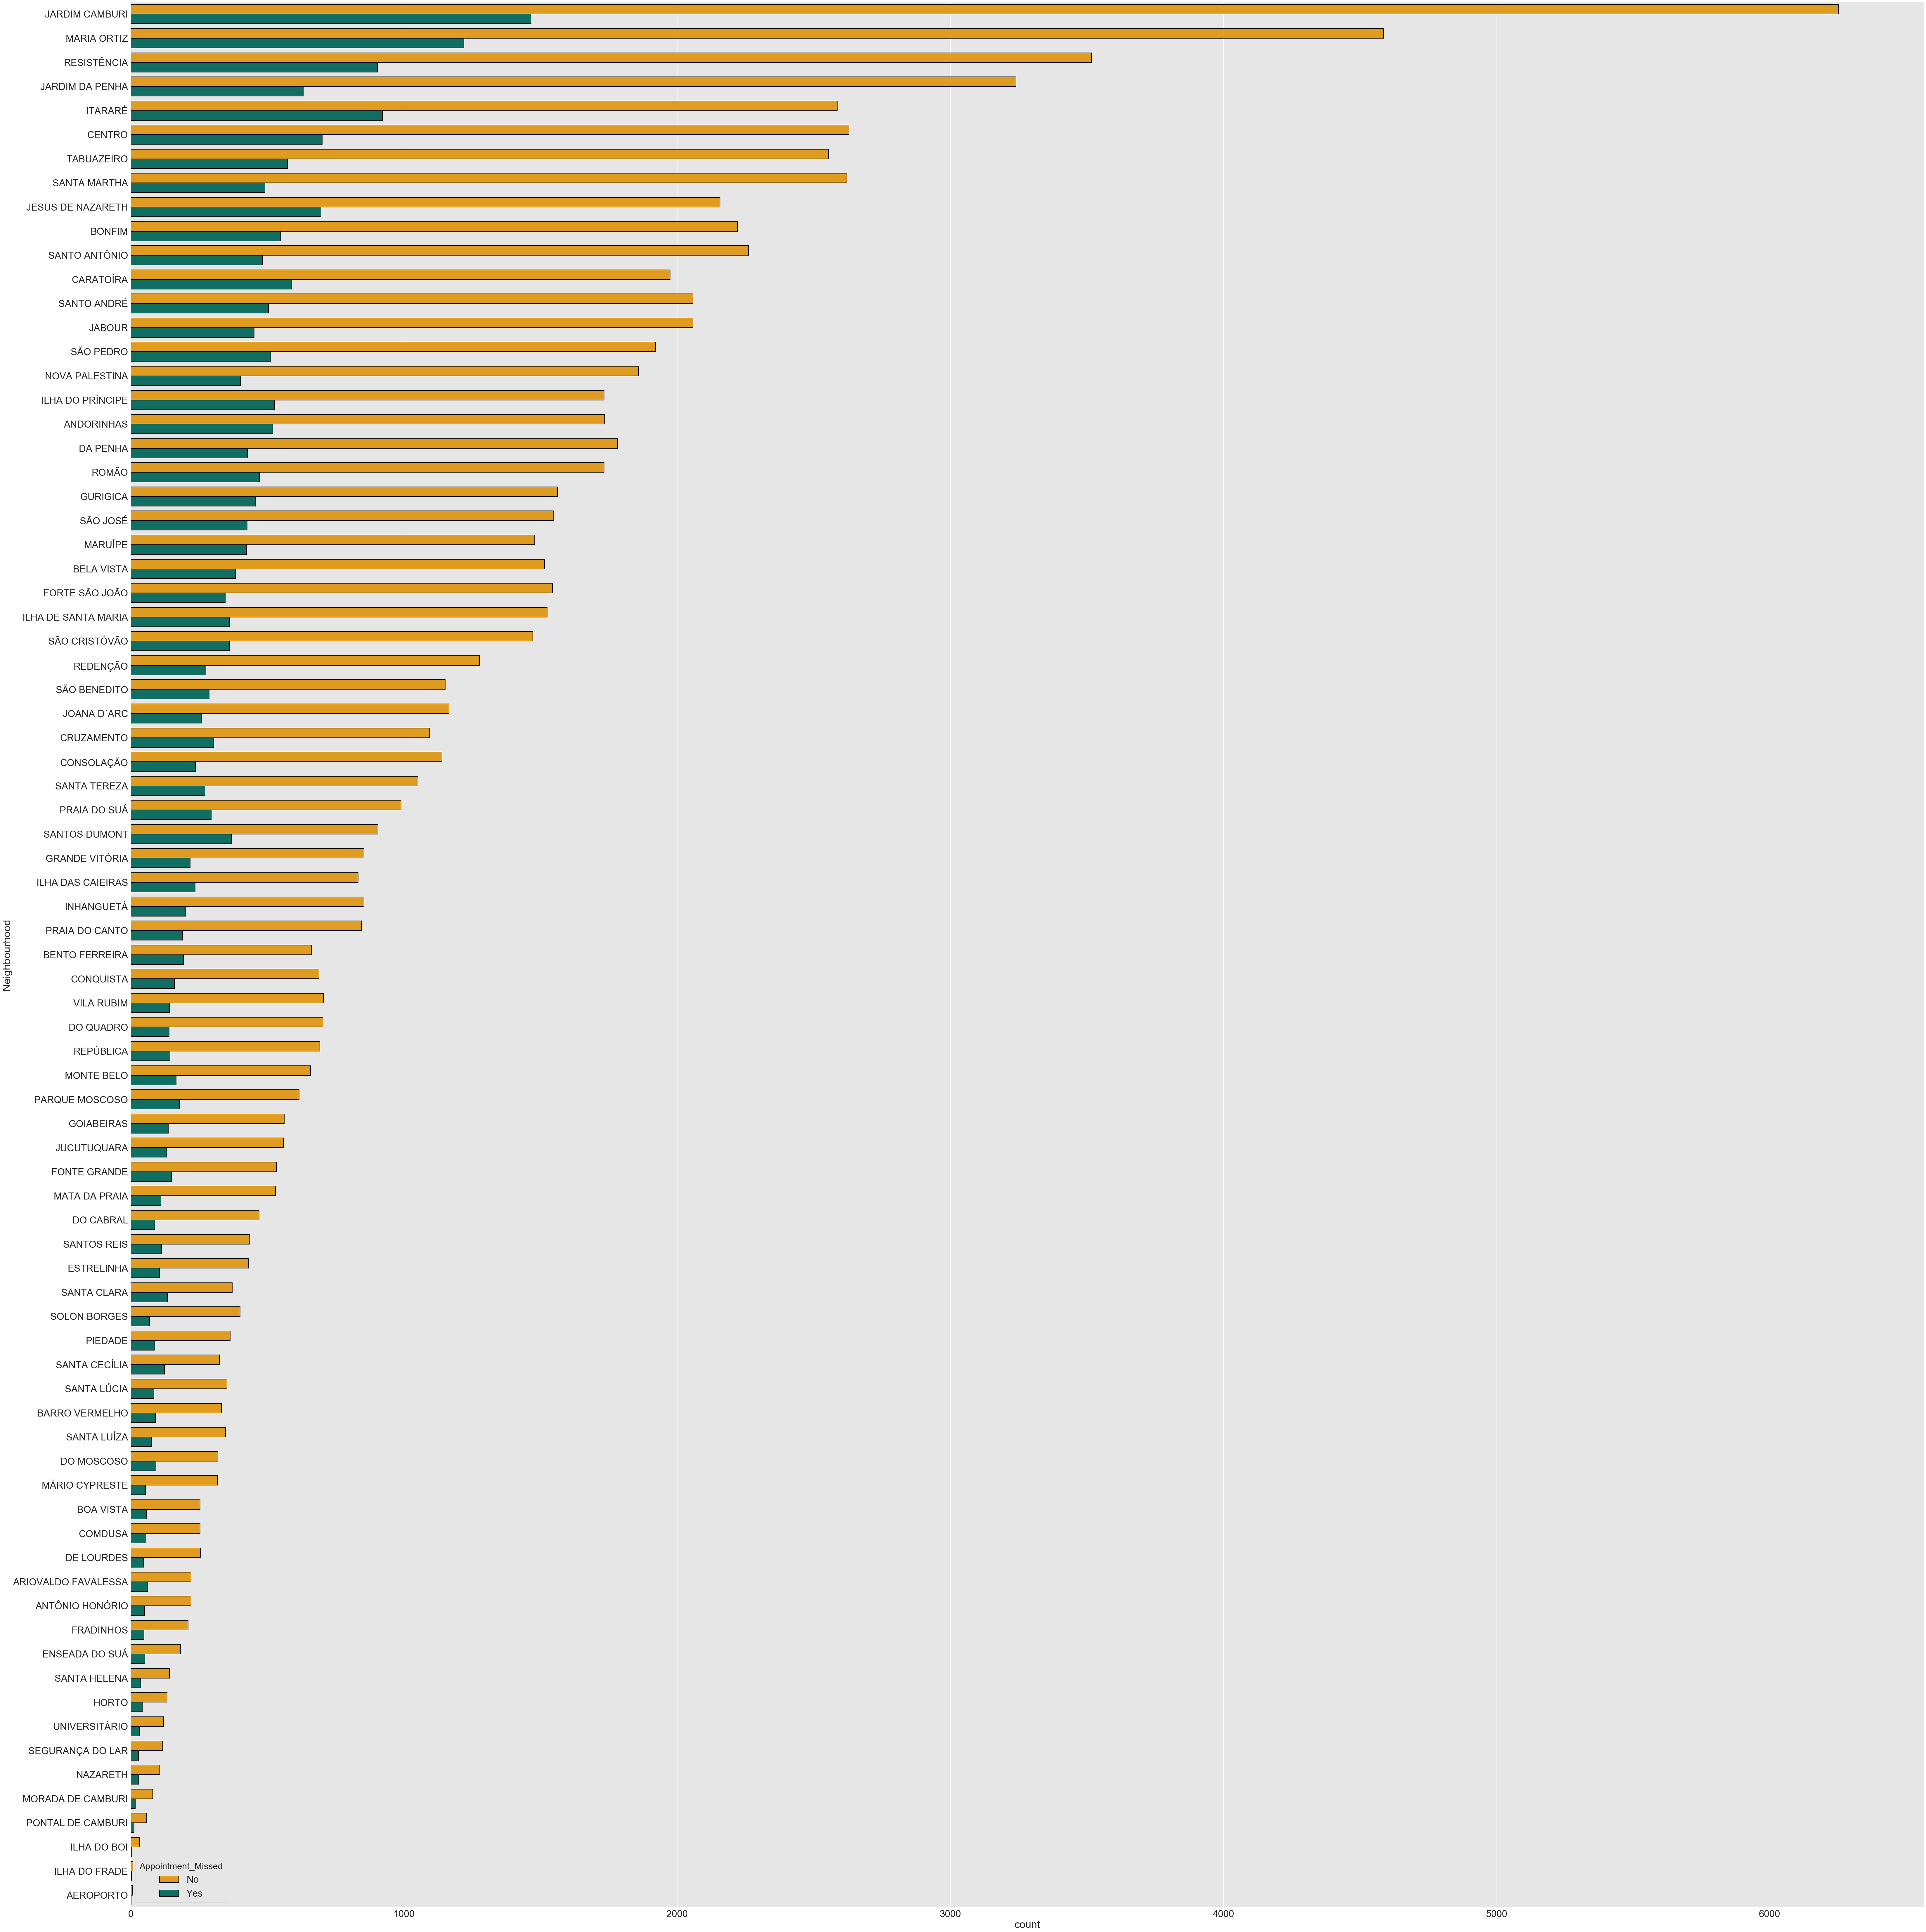

In [57]:
#Neighbourhood Factor Analyzed
plt.figure(figsize=(110,120))

sns.set(font_scale=3,style='darkgrid')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

descending_order = df['Neighbourhood'].value_counts().sort_values(ascending=False).index

sns.countplot(y='Neighbourhood',hue ='Appointment_Missed', data=df,palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2, order=descending_order);


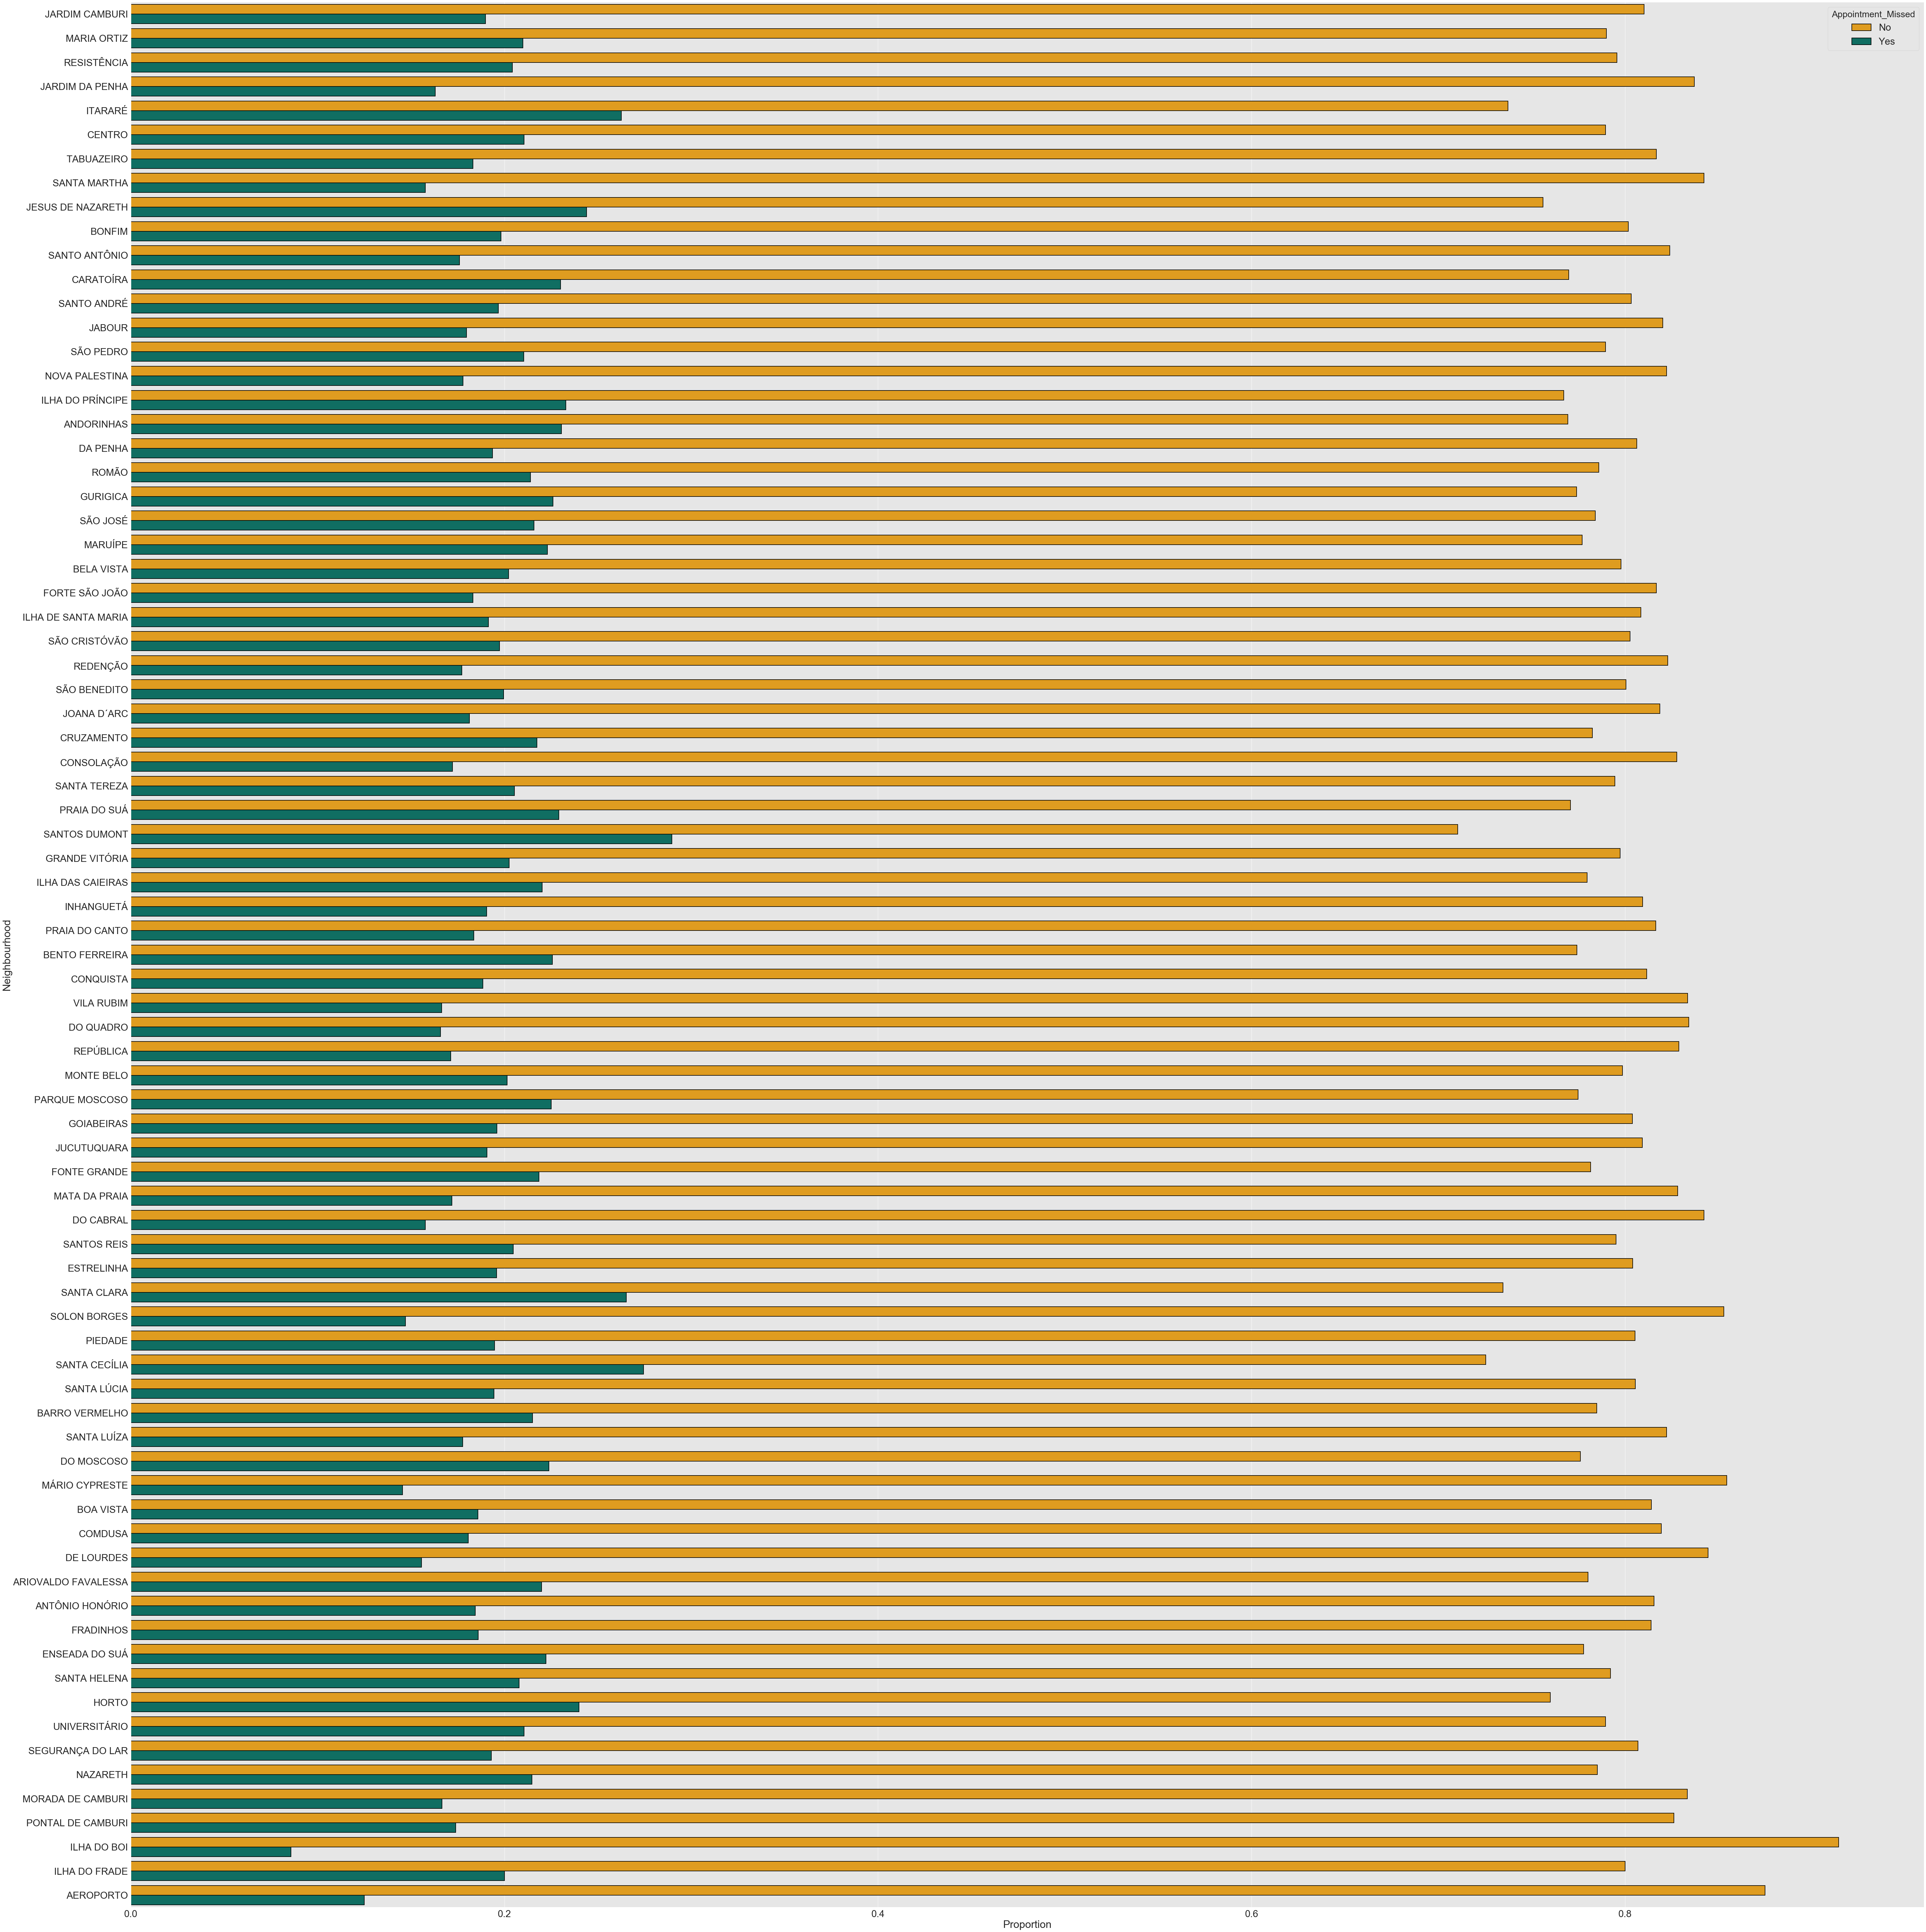

In [58]:
#proportion plot
plt.figure(figsize=(110,120))

sns.set(font_scale=3)
descending_order = df['Neighbourhood'].value_counts().sort_values(ascending=False).index

#sns.set(font_scale=1.25)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
(df.groupby(['Neighbourhood'])['Appointment_Missed']
 .value_counts(normalize=True)
 .rename('Proportion')
 .reset_index()
 .pipe((sns.barplot,"data"), x='Proportion', y='Neighbourhood', hue='Appointment_Missed', palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2, order=descending_order));

Due to each neighbourhood having not similar number of samples hence to make the analysis more just, a proportion plot was produced as shown above. In conclusion, both plots show that no neighbourhood has more number of patients missing their appointment than attending them.

### 1.6 Scholarship Analysis

The Scholarship factor indicates whether or not the patient is enrolled in Brasilian welfare program called Bolsa Família. As shown below in the count plot, patients with scholarship had less appointment missed than those patients who have no scholarship. Also more patients had no scholarship.

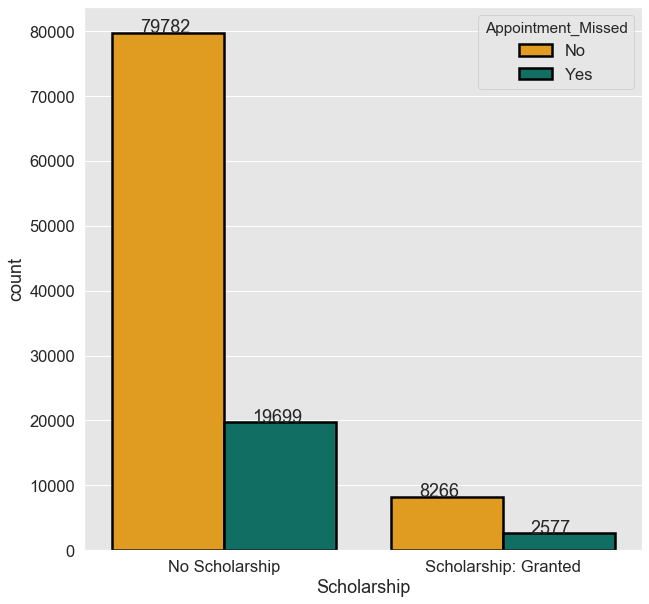

In [59]:
#Scholarship Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
scholarship_1 = sns.countplot(x='Scholarship', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
scholarship_1.set_xticklabels(["No Scholarship","Scholarship: Granted"]);

for p in scholarship_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scholarship_1.text(txt_x+0.1,txt_y,txt)

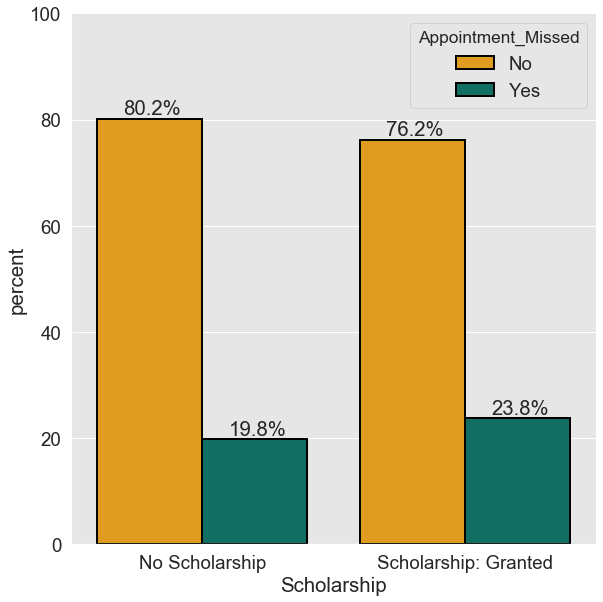

In [60]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
scholarship = df.groupby(['Scholarship'])['Appointment_Missed'].value_counts(normalize=True)
scholarship = scholarship.mul(100)
scholarship = scholarship.rename('percent').reset_index()
scholarship_graph = sns.catplot(x='Scholarship',y='percent',hue='Appointment_Missed',kind='bar',data=scholarship,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

scholarship_graph.fig.set_size_inches(10,10)
scholarship_graph.ax.set_ylim(0,100)
scholarship_graph.set_xticklabels(["No Scholarship","Scholarship: Granted"]);
for p in scholarship_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    scholarship_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion plot above, if equal amount of samples were present for each option of scholarship then patients granted scholarship would have more missed appointments than those patients with no scholarship, though more data would be required to substantiate the observation made. Although, scholarship factor didn't cause more number of appointments being missed than attended.

### 1.7 Hypertension Analysis

The Hypertension factor indicates whether or not the patient has hypertension. As shown below in the count plot, patients with hypertension had less appointment missed than those patients who have no hypertension. Patients with no hypertension missed more appointments than patient with hypertension.

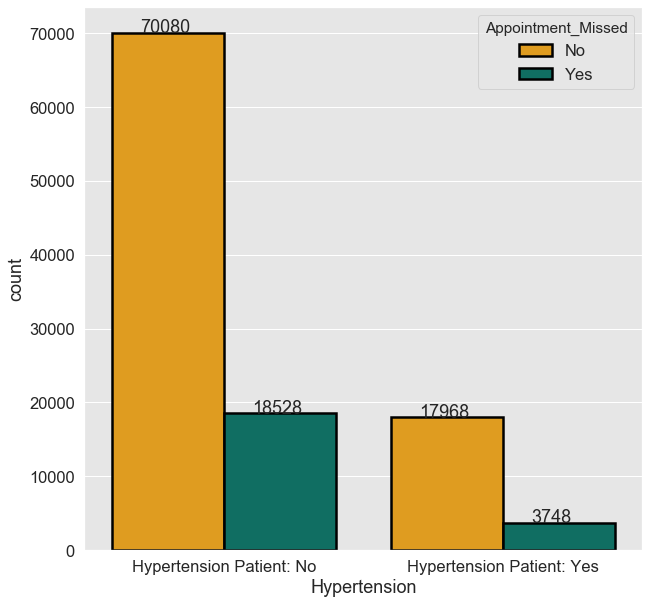

In [61]:
#Hyptertension Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
hyptertension_1 = sns.countplot(x='Hypertension', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
hyptertension_1.set_xticklabels(["Hypertension Patient: No","Hypertension Patient: Yes"]);

for p in hyptertension_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    hyptertension_1.text(txt_x+0.1,txt_y+6.8,txt)

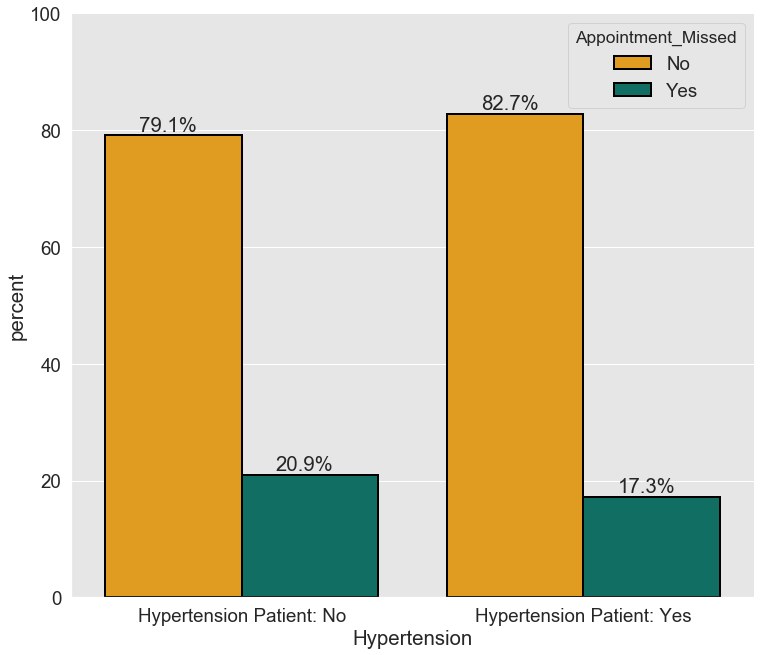

In [62]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
hypertension = df.groupby(['Hypertension'])['Appointment_Missed'].value_counts(normalize=True)
hypertension = hypertension.mul(100)
hypertension = hypertension.rename('percent').reset_index()
hypertension_graph = sns.catplot(x='Hypertension',y='percent',hue='Appointment_Missed',kind='bar',data=hypertension,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

hypertension_graph.fig.set_size_inches(13,11)
hypertension_graph.ax.set_ylim(0,100)
hypertension_graph.set_xticklabels(["Hypertension Patient: No","Hypertension Patient: Yes"]);
for p in hypertension_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    hypertension_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion graph above, if equal amount of samples were present for each hypertension category even then hypertension factor doesn't seem to show more number of appointments being missed than attended. Though patients with  hypertension seem to have more appoinments being attended than patients with no hypertension.

### 1.8 Diabetes Analysis

The Diabetes factor indicates whether or not the patient has diabetes and if being diabetic increases the chance of missing an appointment. As shown below in the count plot, patients with diabetes had less appointment missed than those patients who have no diabetes.

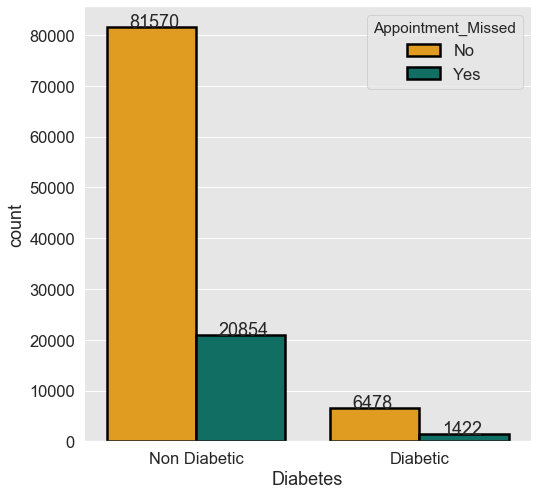

In [63]:
#Diabetes Factor Analyzed
plt.figure(figsize=(8,8))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
e = sns.countplot(x='Diabetes', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
e.set_xticklabels(["Non Diabetic","Diabetic"]);

for p in e.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    e.text(txt_x+0.1,txt_y+7,txt)

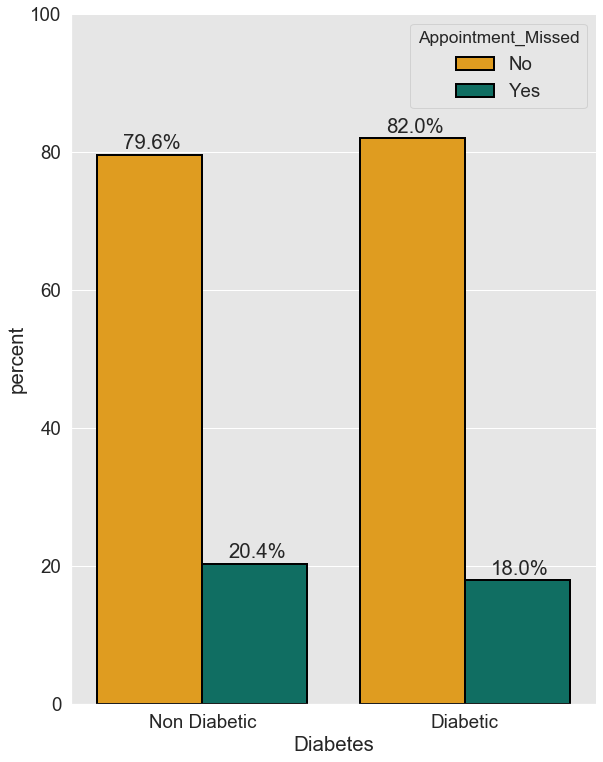

In [64]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
diabetes = df.groupby(['Diabetes'])['Appointment_Missed'].value_counts(normalize=True)
diabetes = diabetes.mul(100)
diabetes = diabetes.rename('percent').reset_index()
diabetes_graph = sns.catplot(x='Diabetes',y='percent',hue='Appointment_Missed',kind='bar',data=diabetes,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

diabetes_graph.fig.set_size_inches(10,13)
diabetes_graph.ax.set_ylim(0,100)
diabetes_graph.set_xticklabels(["Non Diabetic","Diabetic"]);
for p in diabetes_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    diabetes_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion graph above, if equal amount of samples were present for each category, even then diabetes factor doesn't seem to show more number of appointments being missed than attended if patient was diabetic. Though patients with diabetes seem to have more appoinments being attended than patients with no diabetes.

### 1.9 Alcoholism Analysis

The Alcoholism factor indicates whether or not the patient has alcoholism and if being alcoholic increases the chance of missing an appointment. As shown below in the count plot, patients with alcoholism had less appointment missed than those patients who have no alcoholism.

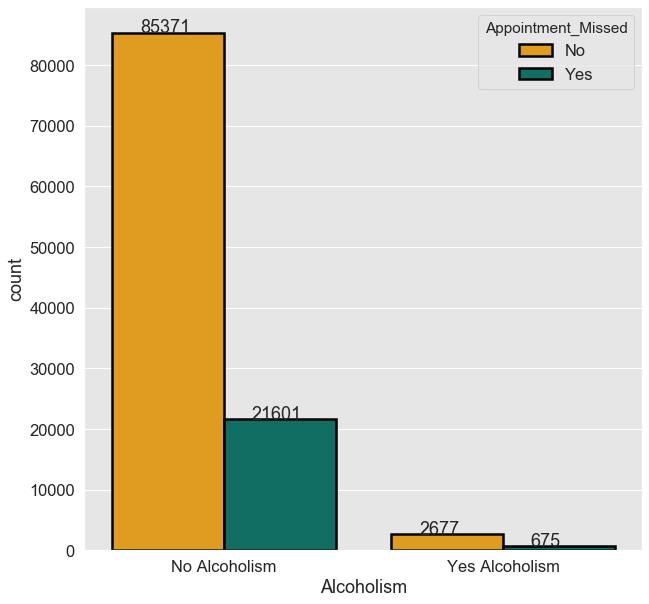

In [65]:
#Alcoholism Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
alc = sns.countplot(x='Alcoholism', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
alc.set_xticklabels(["No Alcoholism","Yes Alcoholism"]);

for p in alc.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    alc.text(txt_x+0.1,txt_y+6.8,txt)

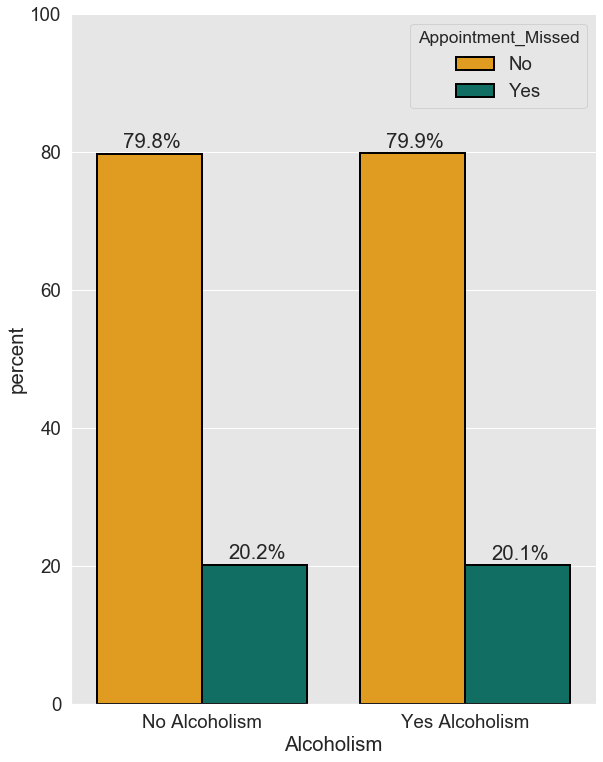

In [66]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
alcoholism = df.groupby(['Alcoholism'])['Appointment_Missed'].value_counts(normalize=True)
alcoholism = alcoholism.mul(100)
alcoholism = alcoholism.rename('percent').reset_index()
alcoholism_graph = sns.catplot(x='Alcoholism',y='percent',hue='Appointment_Missed',kind='bar',data=alcoholism,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

alcoholism_graph.fig.set_size_inches(10,13)
alcoholism_graph.ax.set_ylim(0,100)
alcoholism_graph.set_xticklabels(["No Alcoholism","Yes Alcoholism"]);
for p in alcoholism_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    alcoholism_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion graph above, if equal amount of samples were present for each category, the alcoholism factor seems to show no effect as patients with alcoholism and those with no alcholism have similar proportions as shown above.

### 1.10 Handicap Analysis

The Handicap factor indicates whether or not the patient is handicap and if being handicap increases the chance of missing an appointment. As shown below in the count plot, patients who are handicap had less missed appointments than those patients who are not handicapped.

In [67]:
df.Handicap.value_counts()

0    108282
1      2042
Name: Handicap, dtype: int64

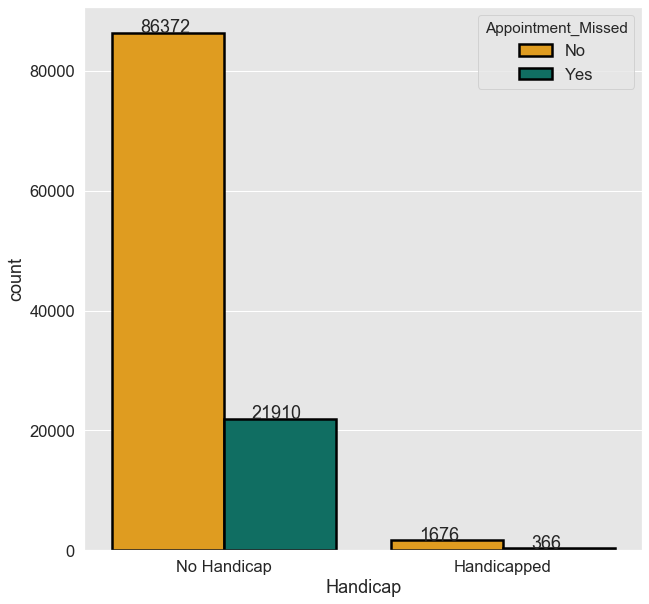

In [68]:
#Handicap Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
handicap_1 = sns.countplot(x='Handicap', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
handicap_1.set_xticklabels(["No Handicap","Handicapped"]);

for p in handicap_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    handicap_1.text(txt_x+0.1,txt_y+6.8,txt)

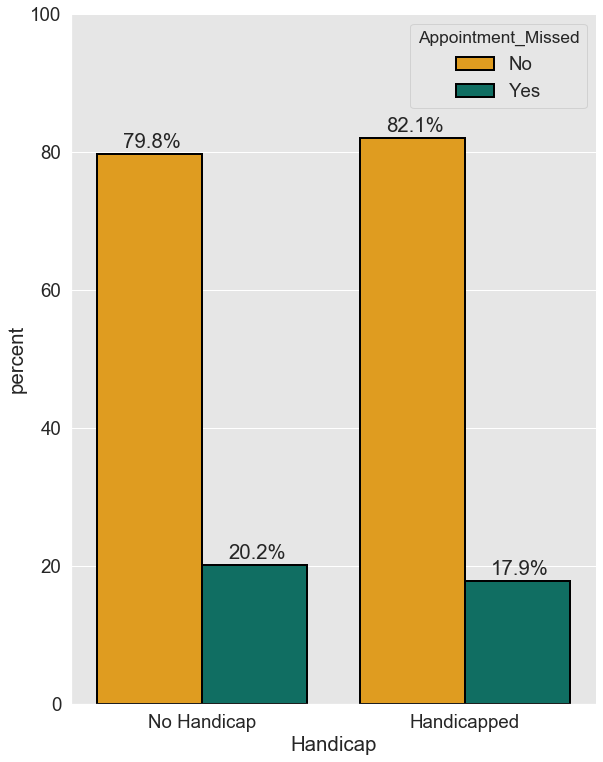

In [69]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
handicap = df.groupby(['Handicap'])['Appointment_Missed'].value_counts(normalize=True)
handicap = handicap.mul(100)
handicap = handicap.rename('percent').reset_index()
handicap_graph = sns.catplot(x='Handicap',y='percent',hue='Appointment_Missed',kind='bar',data=handicap,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

handicap_graph.fig.set_size_inches(10,13)
handicap_graph.ax.set_ylim(0,100)
handicap_graph.set_xticklabels(["No Handicap","Handicapped"]);
for p in handicap_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    handicap_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion graph above, if equal amount of samples were present for each category, then handicap factor doesn't seem to show more number of appointments being missed than attended if patient was handicap. Though patients who are handicapped seems to be attending more appoinments than non-handicapped patients.

### 1.11 SMS Received Analysis

The SMS Received factor indicates whether or not the patient has received SMS prior to the appointment and if receiving SMS decreases the number of missed appointments. As shown below in the count plot, majority of patients didn't receive SMS, only **32% received SMS.** Patients who received SMS had less missed appointments than those patients who received no SMS.

In [70]:
df.SMS_Received.value_counts(normalize=True)

0    0.67881
1    0.32119
Name: SMS_Received, dtype: float64

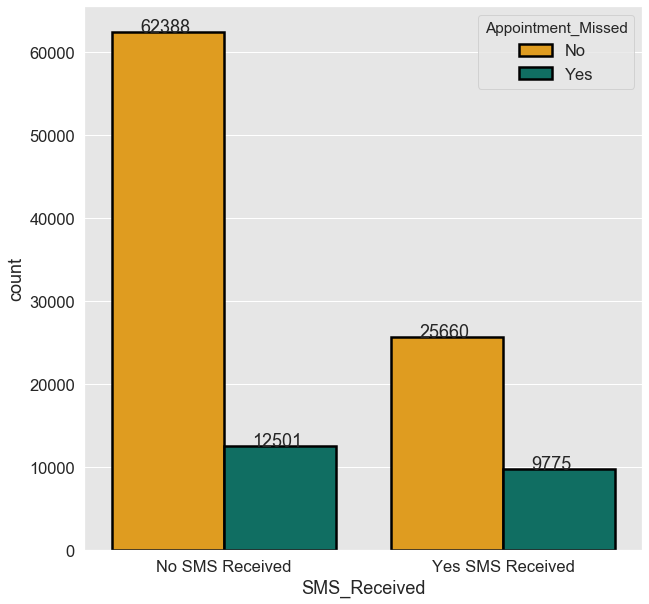

In [71]:
#SMS Received Factor Analyzed
plt.figure(figsize=(10,10))

sns.set(font_scale=1.5)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sms_1 = sns.countplot(x='SMS_Received', data=df, hue='Appointment_Missed', palette=['#ffa600',"#007e6d"],edgecolor=(0,0,0), linewidth=2.5);
sms_1.set_xticklabels(["No SMS Received","Yes SMS Received"]);

for p in sms_1.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    sms_1.text(txt_x+0.1,txt_y+6.8,txt)

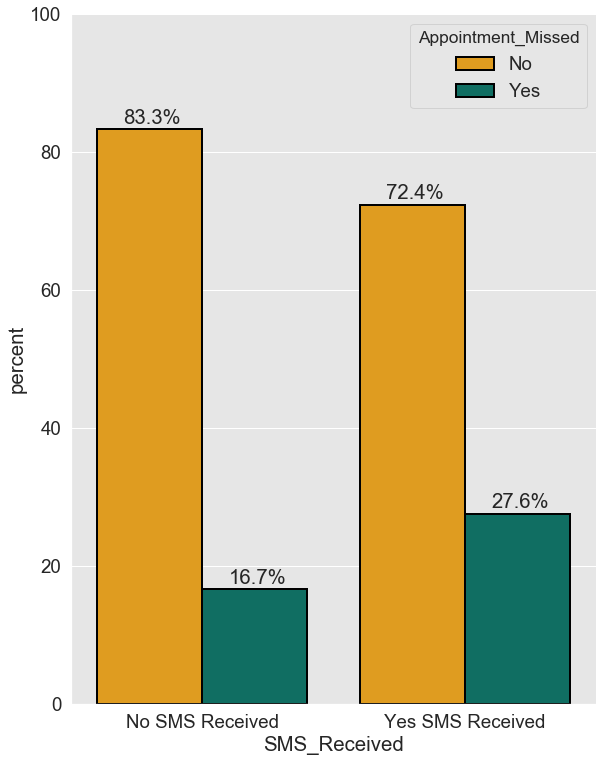

In [72]:
#proportion plot
sns.set(font_scale=1.7)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sms_received = df.groupby(['SMS_Received'])['Appointment_Missed'].value_counts(normalize=True)
sms_received = sms_received.mul(100)
sms_received = sms_received.rename('percent').reset_index()
sms_received_graph = sns.catplot(x='SMS_Received',y='percent',hue='Appointment_Missed',kind='bar',data=sms_received,palette=['#ffa600',"#007e6d"], edgecolor=(0,0,0), linewidth=2,legend_out=False)

sms_received_graph.fig.set_size_inches(10,13)
sms_received_graph.ax.set_ylim(0,100)
sms_received_graph.set_xticklabels(["No SMS Received","Yes SMS Received"]);
for p in sms_received_graph.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    sms_received_graph.ax.text(txt_x+0.1,txt_y+0.8,txt)


Looking at the proportion plot above, if equal amount of samples were present for each category, then patients receiving the SMS seem to show more number of appointments being missed than those who don't receive any SMS.

### Research Question 2: Given the patient has missed the appointment, What factor(s) is/are an indicator for a scheduled appointment to be missed?

In this section, the factors that affect patients to miss their appointment will be analzyed. To carry on the analysis the original dataframe was filtered for the patients which missed their appointment. A preview of the dataframe is shown below.

#### Setting up Dataframe with Missed Appointments only

In [73]:
import warnings
warnings.filterwarnings('ignore')

# create a list of our conditions
conditions = [
    (df_yes['Age'] <= 14),
    (df_yes['Age'] >= 15) & (df_yes['Age'] <= 64),
    (df_yes['Age'] >= 65)]

# create a list of the values we want to assign for each condition
values = ['Children_Adolescents', 'Adult', 'Senior']

# create a new column and use np.select to assign values to it using our lists as arguments
df_yes['Age_Group'] = np.select(conditions, values)

df_yes = movecol(df_yes, 
             cols_to_move=['Age_Group'], 
             ref_col='Age',
             place='After')

# display updated DataFrame
df_yes.head()


Patient_ID Gender Scheduled_Date      Scheduled_Time  Scheduled_Hour  \
6  733688164476661      F     2016-04-27 1900-01-01 15:05:12              15   
7    3449833394123      F     2016-04-27 1900-01-01 15:39:58              15   

   Scheduled_Weekday Appointment_Date  Appointment_Month  Appointment_Day  \
6                  2       2016-04-29                  4               29   
7                  2       2016-04-29                  4               29   

   Appointment_Weekday  Age Age_Group Neighbourhood  Scholarship  \
6                    4   23     Adult    GOIABEIRAS            0   
7                    4   39     Adult    GOIABEIRAS            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMS_Received  \
6             0         0           0         0             0   
7             0         0           0         0             0   

  Appointment_Missed  
6                Yes  
7                Yes

In [74]:
df.Appointment_Missed.value_counts(normalize=True)

No     0.798086
Yes    0.201914
Name: Appointment_Missed, dtype: float64

Only **20%** of the patients have missed their appointment. Now lets investigate what factors standout in helping us know whether the patient will miss ther appointment or not.

### 2.1 Factor: Gender

In [75]:
df_yes['Gender'].value_counts(normalize=True)

F    0.653888
M    0.346112
Name: Gender, dtype: float64

Source Code used below: https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot

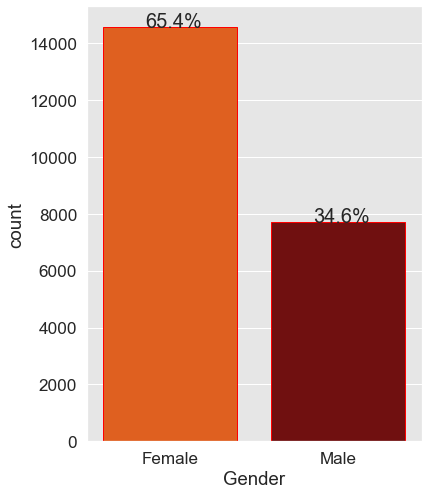

In [76]:
#gender factor
def without_hue(plot, feature):
    total = len(feature)
    for p in gender_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        gender_yes.annotate(percentage, (x-.1, y), size = 20)
    plt.show()

plt.figure(figsize=(6,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#sns.set_palette("colorblind") 
gender_yes = sns.countplot(x='Gender', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
gender_yes.set_xticklabels(["Female","Male"]);
without_hue(gender_yes,df_yes.Gender)#'YlOrRd_r'

As shown in the plot above, females tend to miss their appointments more based on the data given. In the plot above, almost twice as more number of females have missed their appointments than males. Hence **Gender is a strong indicator** for a scheduled appointment to be missed.

### 2.2 Factor: Age Group

In [77]:
df_yes['Age_Group'].value_counts(normalize=True)

Adult                   0.679655
Children_Adolescents    0.220910
Senior                  0.099434
Name: Age_Group, dtype: float64

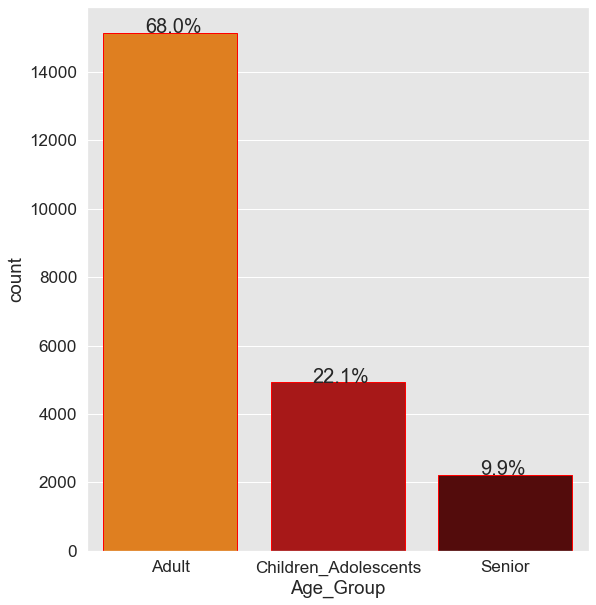

In [78]:
#Age group factor
def without_hue(plot, feature):
    total = len(feature)
    for p in age_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        age_yes.annotate(percentage, (x-.1, y), size = 20)
    plt.show()

plt.figure(figsize=(9,10))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
age_yes = sns.countplot(x='Age_Group', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);

without_hue(age_yes,df_yes.Age_Group)#'YlOrRd_r'

As shown in the plot above, Adults tend to miss their appointments more based on the data given. In the plot above, almost thrice as more adults miss their appointments than children and almost 10 times as more adults missed their appointments than seniors. Hence **Age Group** is **a strong indicator** for a scheduled appointment to be missed.

### 2.3 Scheduled Date Analysis

#### 2.3.1 Schedule Hour

Analyzing the hours at which the appointment was booked and whether the hour factor affected the appointment being missed or not.

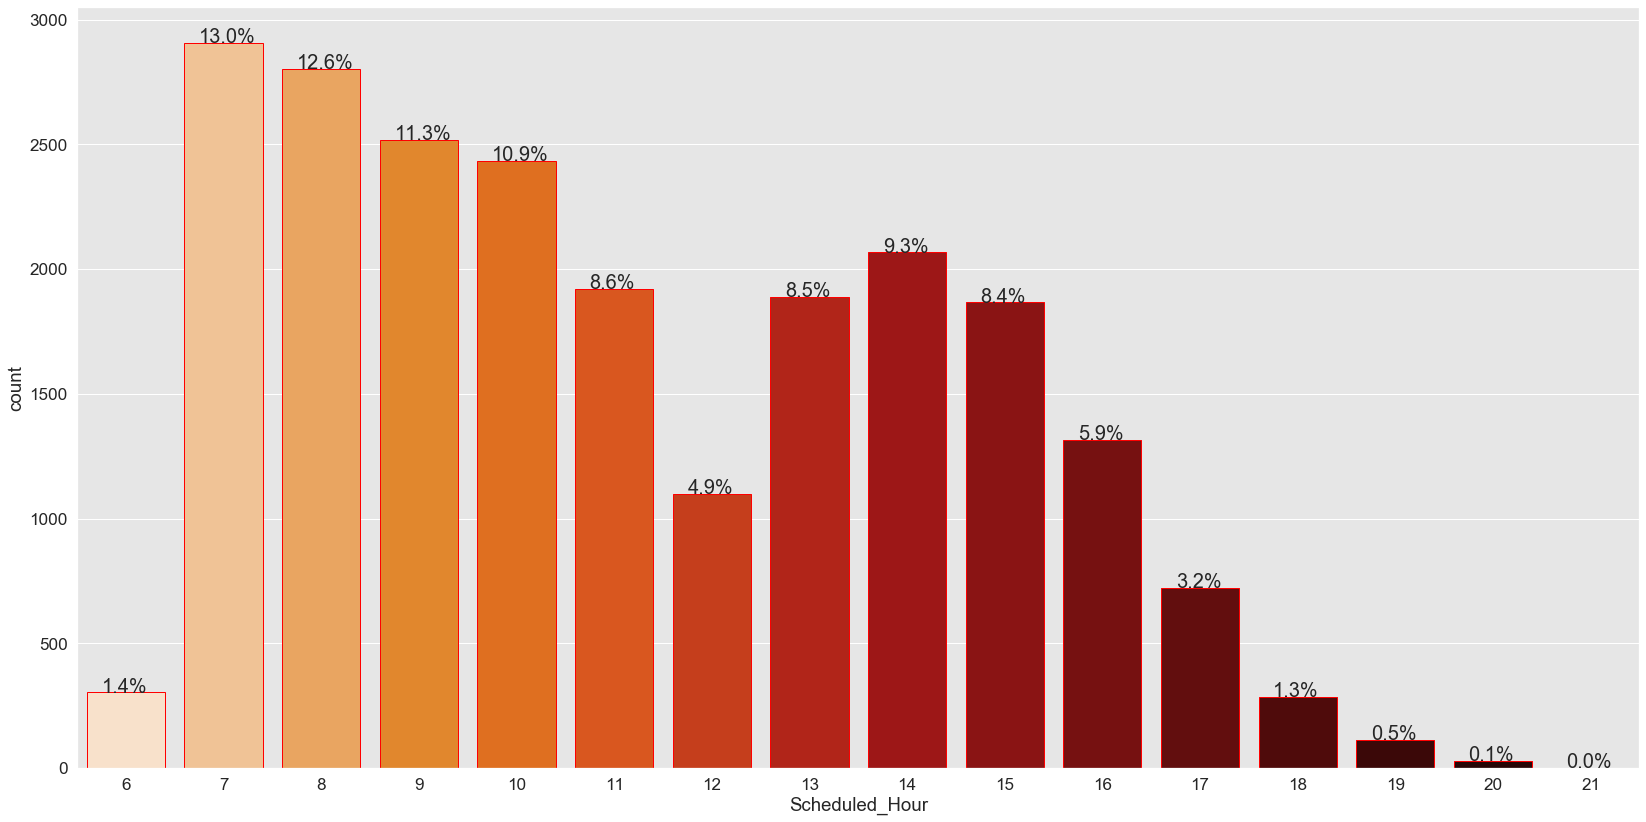

In [79]:
#scheduled_hour factor
def without_hue(plot, feature):
    total = len(feature)
    for p in scheduled_hour_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        scheduled_hour_yes.annotate(percentage, (x-.2, y), size = 20)
    plt.show()

plt.figure(figsize=(28,14))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
scheduled_hour_yes = sns.countplot(x='Scheduled_Hour', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
without_hue(scheduled_hour_yes,df_yes.Scheduled_Hour)

Analyzing the above plot, **majority of appointments that were missed occured when the appointments were booked from 7 to 10 am and at 2 pm.** Least number of appointments missed occured when the appointment was booked at **6 am and 5-9 pm.**

To conclude, the **scheduled hour factor** is a **good indicator** to show if a patient will show up for their scheduled appointment or not.

#### 2.3.2 Schedule Weekday

Now breaking down the scheduled date factor further, I analyzed the weekday at which the appointment was booked and whether this factor affected the appointment being missed or not.

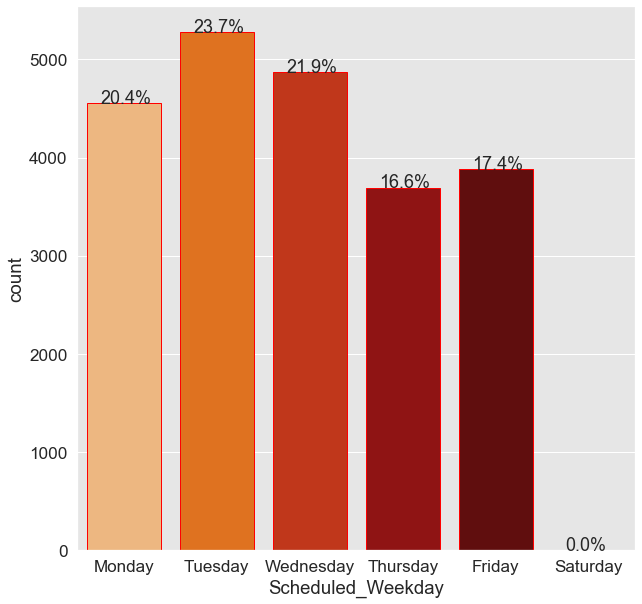

In [80]:
#scheduled_weekday factor
def without_hue(plot, feature):
    total = len(feature)
    for p in scheduled_weekday_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        scheduled_weekday_yes.annotate(percentage, (x-.2, y), size = 18)
    plt.show()

plt.figure(figsize=(10,10))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) 
scheduled_weekday_yes = sns.countplot(x='Scheduled_Weekday', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
scheduled_weekday_yes.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);
without_hue(scheduled_weekday_yes,df_yes.Scheduled_Weekday)#'YlOrRd_r'

Tuesday among the other weekdays have the most number of appointments missed followed by Wednesday and Monday. Whereas Saturday witnessed the least number of appointments attended and missed. **Scheduled Weekday factor** is **not a strong indicator** for appointments to be missed.

### 2.4 Appointment Date Analysis

In the appointment date factor only the date was avaliable. So this factor was broken down into 2 subfactors: appointment month and weekday.  

#### 2.4.1 Appointment Month

In this subfactor the month at which the appointment was booked for was analyzed. The analysis included whether the month of the appointment had an impact on the appointment being missed or not.

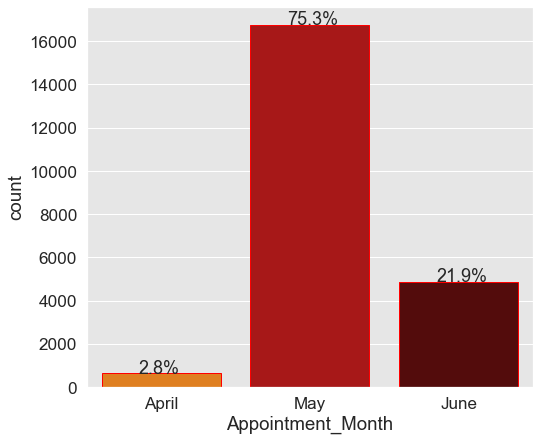

In [81]:
#Appointment Month factor
def without_hue(plot, feature):
    total = len(feature)
    for p in appointment_month_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        appointment_month_yes.annotate(percentage, (x-.1, y), size = 18)
    plt.show()

plt.figure(figsize=(8,7))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
appointment_month_yes = sns.countplot(x='Appointment_Month', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
appointment_month_yes.set_xticklabels(["April","May","June"]);
without_hue(appointment_month_yes,df_yes.Appointment_Month)

Analyzing the plot above, the month of May received the most number of missed appointments almost 26 times more than April and 3 times
more than June. Based on this, the **appointment month factor could be a good predictor** to show if a patient will show up for their scheduled appointment or not, but we need more data from other months to make an accurate analysis.

#### 2.4.2 Appointment Weekday

In this factor the weekday at which the appointment was booked for was analyzed. The analysis included whether the weekday that the appointment happens to fall on had an impact on the appointment being missed or not.

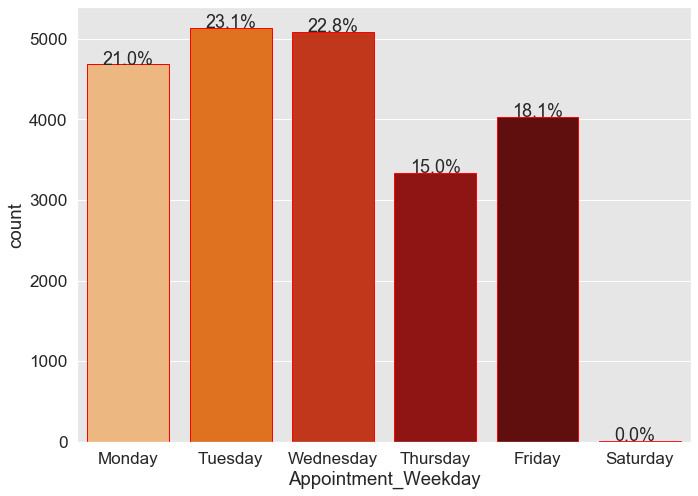

In [82]:
#Appointment Weekday factor
def without_hue(plot, feature):
    total = len(feature)
    for p in appointment_weekday_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        appointment_weekday_yes.annotate(percentage, (x-.2, y), size = 18)
    plt.show()

plt.figure(figsize=(11,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
appointment_weekday_yes = sns.countplot(x='Appointment_Weekday', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
appointment_weekday_yes.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);
without_hue(appointment_weekday_yes,df_yes.Appointment_Weekday)#'YlOrRd_r'

Tuesday among the other weekdays have the most number of appointments missed followed by Wednesday and Monday. Whereas Saturday witnessed the least number of appointments missed. **Appointment Weekday factor** is **not a strong indicator** for appointments to be missed.

### 2.5 Neighbourhood Analysis

In the Neighbourhood factor analysis, the plot below shows which neighbourhood faced missed appointments. As shown below JARDIM CAMBURI has the most number of missed appointments followed by MARIA ORTIZ. On the contrary there were no missed appointments in ILHA DO BOI, ILHA DO FRADE and AEROPORTO neighbourhood.

In [83]:
df_yes['Neighbourhood'].value_counts(normalize=True).sort_values(ascending=False)

JARDIM CAMBURI       0.065766
MARIA ORTIZ          0.054723
ITARARÉ              0.041345
RESISTÊNCIA          0.040537
CENTRO               0.031469
                       ...   
MORADA DE CAMBURI    0.000718
PONTAL DE CAMBURI    0.000539
ILHA DO BOI          0.000135
ILHA DO FRADE        0.000090
AEROPORTO            0.000045
Name: Neighbourhood, Length: 79, dtype: float64

In [84]:
#Neighbourhood factor
def without_hue(plot, feature):
    total = len(feature)
    for p in neighbourhood_yes.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()
        neighbourhood_yes.annotate(percentage, (x+4, y), size = 50)
    plt.show()
descending_order = df['Neighbourhood'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(110,140))
sns.set(font_scale=4)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
neighbourhood_yes =sns.countplot(y='Neighbourhood', data=df_yes,palette=['#ffa600'],edgecolor=(0,0,0), linewidth=1, order=descending_order);
without_hue(neighbourhood_yes,df_yes.Neighbourhood)#'YlOrRd_r'

In conclusion, the **neighbourhood factor** is a **good predictor given we have more detail about the socio-economic conditions so that a more accurate analysis could be carried out.**

### 2.6 Scholarship Analysis

The Scholarship factor indicates whether or not the patient is enrolled in Brasilian welfare program called Bolsa Família and how this contributed to appointments being missed. As shown below in the plot, patients with scholarship had 8 times less appointment being missed than those patients who have no scholarship.

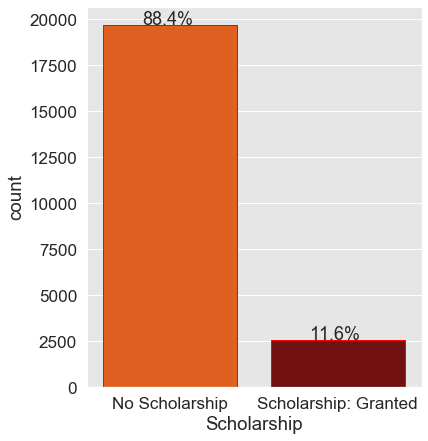

In [85]:
#Scholarship factor
def without_hue(plot, feature):
    total = len(feature)
    for p in scholarship_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        scholarship_missed.annotate(percentage, (x-.12, y), size = 18)
    plt.show()

plt.figure(figsize=(6,7))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
scholarship_missed = sns.countplot(x='Scholarship', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
scholarship_missed.set_xticklabels(["No Scholarship","Scholarship: Granted"]);
without_hue(scholarship_missed,df_yes.Scholarship)#'YlOrRd_r'

In conclusion, the **scholarship factor** is a **very strong indicator** for appointments to be missed.

### 2.7 Hypertension Analysis

The Hypertension factor indicates whether or not the patient has hypertension and how this contributed to appointments being missed. As shown below in the plot, patients with no hypertension had about 5 times more appointments being missed than those patients who have hypertension.

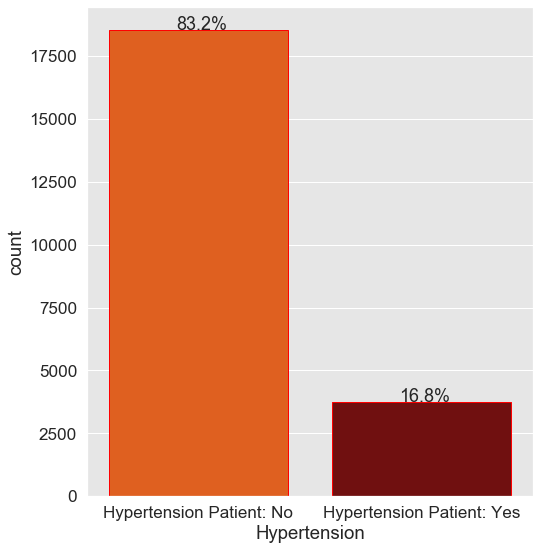

In [86]:
#Hypertension factor
def without_hue(plot, feature):
    total = len(feature)
    for p in hypertension_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        hypertension_missed.annotate(percentage, (x-.05, y), size = 18)
    plt.show()

plt.figure(figsize=(8,9))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
hypertension_missed = sns.countplot(x='Hypertension', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
hypertension_missed.set_xticklabels(["Hypertension Patient: No","Hypertension Patient: Yes"]);
without_hue(hypertension_missed,df_yes.Hypertension)#'YlOrRd_r'

In conclusion, the **hypertension factor** is a **very strong indicator** for appointments to be missed.

### 2.8 Diabetes Analysis

The Diabetes factor indicates whether or not the patient has diabetes and how this contributed to appointments being missed. As shown below in the plot, patients with no diabetes had about 15 times more appointments being missed than those patients who have diabetes.

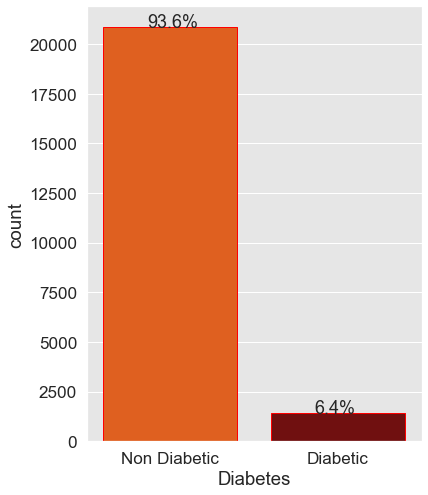

In [87]:
#Diabetes factor
def without_hue(plot, feature):
    total = len(feature)
    for p in diabetes_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        diabetes_missed.annotate(percentage, (x-0.09, y), size = 18)
    plt.show()

plt.figure(figsize=(6,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
diabetes_missed = sns.countplot(x='Diabetes', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
diabetes_missed.set_xticklabels(["Non Diabetic","Diabetic"]);
without_hue(diabetes_missed,df_yes.Diabetes)#'YlOrRd_r'

In conclusion, the **diabetes factor** is a **very strong indicator** for appointments to be missed.

### 2.9 Alcoholism Analysis

The Alcoholism factor indicates whether or not the patient has alcoholism and how this contributed to appointments being missed. As shown below in the plot, patients with no alcoholism had about 32 times more appointments being missed than those patients who have alcoholism.

In [88]:
df_yes.Alcoholism.value_counts(normalize=True)

0    0.969698
1    0.030302
Name: Alcoholism, dtype: float64

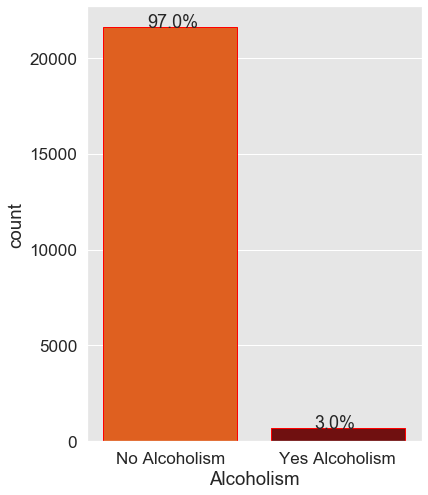

In [89]:
#Alcoholism factor
def without_hue(plot, feature):
    total = len(feature)
    for p in alcoholism_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        alcoholism_missed.annotate(percentage, (x-0.09, y), size = 18)
    plt.show()

plt.figure(figsize=(6,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
alcoholism_missed = sns.countplot(x='Alcoholism', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
alcoholism_missed.set_xticklabels(["No Alcoholism","Yes Alcoholism"]);
without_hue(alcoholism_missed,df_yes.Alcoholism)#'YlOrRd_r'

In conclusion, the **alcoholism factor** is a **very strong indicator** for appointments to be missed.

### 2.10 Handicap Analysis

The Handicap factor indicates whether or not the patient is handicapped and how this contributed to appointments being missed. As shown below in the plot, patients who are not handicap had about 61 times more appointments being missed than those patients who are handicap.

In [90]:
df_yes.Handicap.value_counts(normalize=True).round(3)

0    0.984
1    0.016
Name: Handicap, dtype: float64

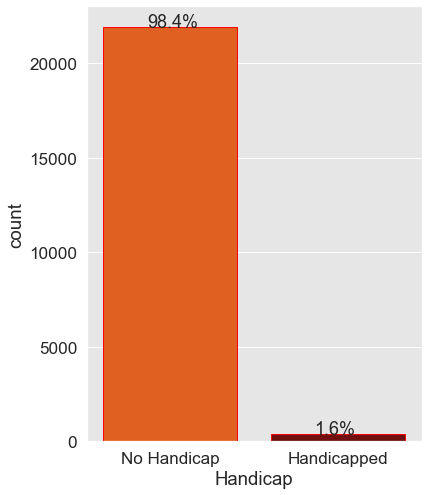

In [91]:
#Handicap factor
def without_hue(plot, feature):
    total = len(feature)
    for p in handicap_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        handicap_missed.annotate(percentage, (x-0.09, y), size = 18)
    plt.show()

plt.figure(figsize=(6,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
handicap_missed = sns.countplot(x='Handicap', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
handicap_missed.set_xticklabels(["No Handicap","Handicapped"]);
without_hue(handicap_missed,df_yes.Handicap)#'YlOrRd_r'

In conclusion, the **handicap factor** is **a very strong indicator** for appointments to be missed.

### 2.11 SMS Received Analysis

The SMS received factor indicates whether or not the patient received SMS prior to the appointment and how receiving a SMS contributed to appointments being missed or not. As shown in the plot below, patients who received SMS missed around the same amount of appointments as those patients who didnt receive SMS.

In [92]:
df_yes.SMS_Received.value_counts(normalize=True).round(3)

0    0.561
1    0.439
Name: SMS_Received, dtype: float64

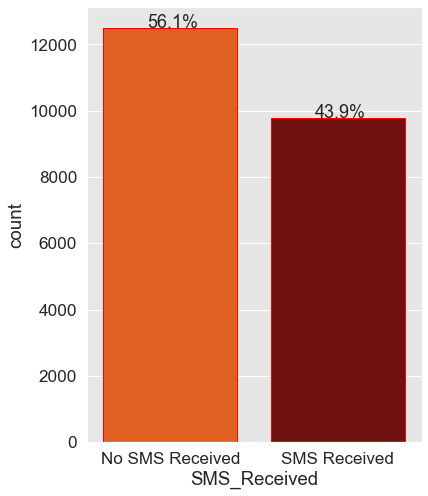

In [93]:
#SMS factor
def without_hue(plot, feature):
    total = len(feature)
    for p in sms_missed.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        sms_missed.annotate(percentage, (x-0.09, y), size = 18)
    plt.show()

plt.figure(figsize=(6,8))
sns.set(font_scale=1.55)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sms_missed = sns.countplot(x='SMS_Received', data=df_yes,palette='gist_heat_r',edgecolor=(1,0,0), linewidth=1);
sms_missed.set_xticklabels(["No SMS Received","SMS Received"]);
without_hue(sms_missed,df_yes.SMS_Received)

In conclusion, the **SMS Received factor** is **not a very strong indicator** for appointments to be missed.

<a id='conclusions'></a>
## Conclusions

#### Summary

* Gender **is** a **strong indicator** for a scheduled appointment to be missed.
* Age Group **is** a **strong indicator** for a scheduled appointment to be missed.
* Scheduled Hour **is** a **good indicator** to show if a patient will show up for their scheduled appointment or not.
* Scheduled Weekday **is not** a **strong indicator** for appointments to be missed.
* Appointment Month **could be** a **good indicator** to show if a patient will show up for their scheduled appointment or not, **but we need more data from other months to make an accurate analysis.**
* Appointment Weekday **is not** a **strong indicator** for appointments to be missed.
* Neighbourhood factor **is** a **good indicator** given we have more detail about the socio-economic conditions so that a more accurate analysis could be carried out.
* Scholarship factor **is** a **very strong indicator** for appointments to be missed.
* Hypertension factor **is** a **very strong indicator** for appointments to be missed.
* Diabetes factor **is** a **very strong indicator** for appointments to be missed.
* Alcoholism factor **is** a **very strong** indicator for appointments to be missed.
* Handicap factor **is** a **very strong indicator** for appointments to be missed.
* SMS Received factor **is not** a **very strong indicator** for appointments to be missed.

#### Limitations
More data is needed to further make the outcomes more credible. In addition, for neighbourhood factor analysis more information is needed on the socio-economic conditions. Lastly, more characteristics about patient's medical history and other personal information can help to come to a more concrete conclusion.

<a id='references'></a>
## References

https://www.thetopsites.net/article/52692083.shtml

https://medium.com/@deallen7/managing-date-datetime-and-timestamp-in-python-pandas-cc9d285302ab#1b5b

https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects

https://datatofish.com/strings-to-datetime-pandas/

https://www.dezyre.com/recipes/split-datetime-data-create-multiple-feature-in-python

https://en.wikipedia.org/wiki/List_of_countries_by_age_structure

https://www.mmbyte.com/article/2228.html

https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

 https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot